# COMP5329 Assignment 1

### Team Member

| Name | SID |
|:----:|:---:|
| Mirope Yuhao Hu | 470139936 |
| Sean Hongbo Du  | 500635346 |
| Liam Watts      | 510562348 |

### Experiment Information
- Experiment environment
  - __Google Colab__, Python 3 Google Compute Engine backend
- Running Time
  - Only with the best model: __7 mins__
  - All models + All evaluation: around 5 hours

## How to run the code

1. Put all 4 dataset files (`test_data.npy`, `test_label.npy`, `train_data.npy`, `train_label.npy`) in __the same directory__ as this code file
2. Make sure you have all the python packages installed listed in Section 0 (All Necessary Imports).
3. Since runing all experiments will take very long time (~5 hrs), we recommend to __only run cells till section 4.2.2 (The best performing experiment__ (excluding all experiments and visualisations for comparsions of hyper-parameters).

## 0. All necessary Imports

In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from abc import ABCMeta, abstractmethod

S_t = time.time() # a global timer 

## 1. Data Loading

In [ ]:
# load data in the current directory
dir_name = './'

test_data = np.load(dir_name + 'test_data.npy')
test_label = np.load(dir_name + 'test_label.npy')
train_data = np.load(dir_name + 'train_data.npy')
train_label = np.load(dir_name + 'train_label.npy')

print('Shape of original train data is:\t', train_data.shape,
      '\nShape of original train label is:\t', train_label.shape,
      '\nShape of original test data is:\t\t', test_data.shape,
      '\nShape of original test label is:\t', test_label.shape )

# one hot encoding the labels set 
def oneHot_encoder(data_label):
    '''returns the labels in one hot encodings'''
    encoded = list()
    for value in data_label:
        label_onehot = [0 for index in range(10)]
        label_onehot[int(value)] = 1
        encoded.append(label_onehot)
    return np.array(encoded)

test_x = test_data
train_x = train_data
test_y = oneHot_encoder(test_label)
train_y = oneHot_encoder(train_label)

print('\nShape of transformed train label is:\t', train_y.shape,
      '\nShape of transformed train label is:\t', test_y.shape )

Shape of original train data is:	 (50000, 128) 
Shape of original train label is:	 (50000, 1) 
Shape of original test data is:		 (10000, 128) 
Shape of original test label is:	 (10000, 1)

Shape of transformed train label is:	 (50000, 10) 
Shape of transformed train label is:	 (10000, 10)


(array([5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
        5000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

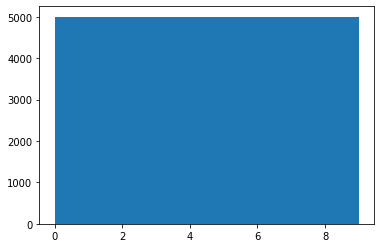

In [ ]:
# IS THIS MNIST? This seems like a version of mnist that has been cropped and/or compressed, potentially to 16x8 px format
# 50000 train and 10000 test data
# 10 labels (1 for each digit)
# Equal Distribution of labels
plt.hist(train_label, bins=10)

Plot of image 9068


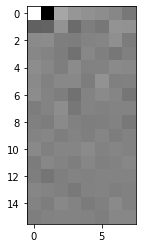

In [ ]:
i = int(np.random.rand(1)[0]*50000)
example = train_x[i].reshape(16, 8)
print("Plot of image {}".format(i))
plt.imshow(example, cmap="gray")

We can see there is a slight difference between the mean and variance in the train and test set. However it is so small it may just be noise

In [ ]:
np.var(train_data, axis=0)

array([55.36221532, 21.42610631, 12.74623602,  7.00001712,  6.87127565,
        5.34880374,  5.16556597,  4.12630065,  3.93109939,  2.73797028,
        2.49532554,  2.02963436,  1.99917554,  1.91213804,  1.74880008,
        1.55633866,  1.40822139,  1.36351895,  1.30895333,  1.22474247,
        1.13173705,  1.11832968,  0.94356571,  0.93447335,  0.91478583,
        0.88703523,  0.85937143,  0.84472208,  0.76309099,  0.74992529,
        0.69728204,  0.63430121,  0.6168332 ,  0.59071185,  0.58564874,
        0.55454252,  0.49736371,  0.49363493,  0.48427615,  0.4729137 ,
        0.4620485 ,  0.43662686,  0.43444704,  0.42177255,  0.40033769,
        0.39361913,  0.36644058,  0.36248388,  0.35159471,  0.3459519 ,
        0.339013  ,  0.33053728,  0.32590068,  0.32322361,  0.30908673,
        0.30195794,  0.29780971,  0.29379005,  0.29149006,  0.28545631,
        0.2775746 ,  0.27098872,  0.26868761,  0.26219491,  0.25676466,
        0.25259875,  0.24531904,  0.23669428,  0.23112182,  0.23

In [ ]:
((np.var(train_data, axis=0) - np.var(test_data, axis=0))*100).astype(int)

array([  4,  76, -33,  -1,  11,   5,   4,   9,   5, -10,   6,   2,   0,
         0,  -2,   0,   0,  -1,   3,  -3,   4,   0,   2,  -1,   0,   0,
         0,  -2,   0,  -4,   0,  -2,   0,   0,   1,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  -1,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

In [ ]:
((np.mean(train_data, axis=0) - np.mean(test_data, axis=0))*100).astype(int)

array([-18,   0,  -5,   0,   1,  -1,   0,  -1,   3,   0,   3,   3,   0,
         0,   0,   1,   0,   0,   0,   2,   0,   1,   0,   0,  -3,   1,
         0,   1,   1,   0,   0,   0,   0,   0,  -1,   0,   0,   0,   1,
         0,   0,  -1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  -1,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   1,   0,   0,   0,  -1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

## 2. Data Preprocessing



Data were normalized via dividing by the maximum positive number in the column.  

To visualize the dataset, the test data were transformed from (10000, 128) to (10000, 2, 64). According to the scatter plot of the nine classes, there is not much differences of the scatter plots between the classes. 

In [ ]:
# data normalization to : [0, 1]
def normalization(dataset):
    '''returns the normalized data'''
    n_features = dataset.shape[1]
    min_d = dataset.min(axis = 0).reshape(1, n_features) # make sure the minimum is the correct dimension
    max_d = dataset.max(axis = 0).reshape(1, n_features)
    return (dataset - min_d)/(max_d - min_d)

# normalize the datasets
norm_train_data = normalization(train_data)
norm_test_data = normalization(test_data)

# reframe labels as DataFrame and renaming  
train_label_df = pd.DataFrame(train_label).rename(columns={0: "class"})
test_label_df = pd.DataFrame(test_label).rename(columns={0: "class"})

# combining data and labels as DataFrame
train_df = pd.concat([pd.DataFrame(train_data.T), train_label_df.transpose()], axis=0).transpose()
test_df = pd.concat([pd.DataFrame(test_data.T), test_label_df.transpose()], axis=0).transpose()

def pca_analysis(input_dat, num_components):
    '''returns the principal component analysis given the input data according to the number of components'''
    dat_mean = np.mean(input_dat, axis=0)
    # calculate the covariance matrix
    cov_matrix = np.cov(input_dat - dat_mean, rowvar=False)
    # calculation and manipulation on the eigens
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    eigenvectors = eigenvectors.transpose()
    sorted_components = np.argsort(eigenvalues)[::-1]
    # calculate the projection matrix
    proj_matrix = eigenvectors[sorted_components[:num_components]]
    return np.dot(input_dat - dat_mean, proj_matrix.transpose())

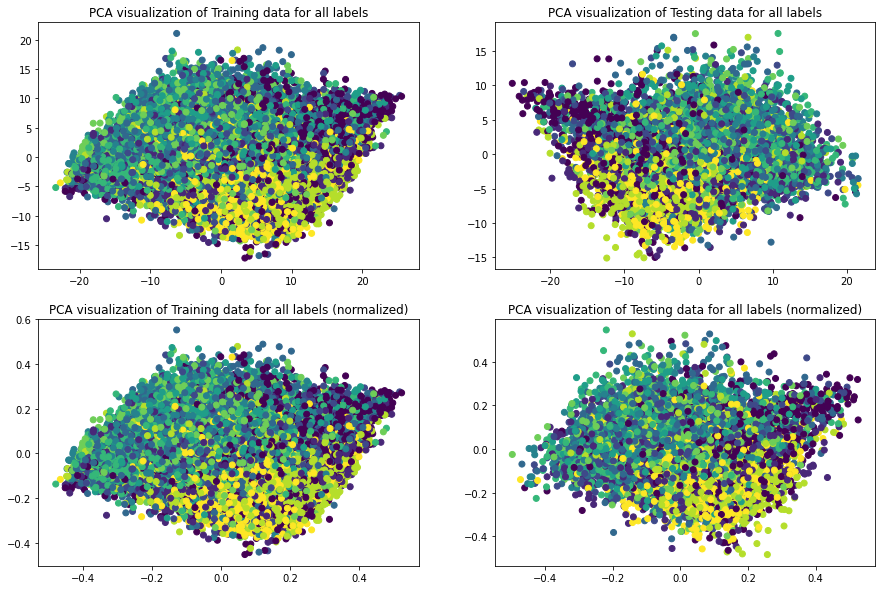

In [ ]:
# Plot of the PCA of all classes
pca_train = pca_analysis(train_df[train_df.columns[0:128]], 2)
pca_test = pca_analysis(test_df[test_df.columns[0:128]], 2)
plt.figure(figsize=(15, 10))

ax1 = plt.subplot(2, 2, 1)
ax1.scatter(pca_train[:, 0], pca_train[:, 1], c=train_df['class'])
ax1.set_title("PCA visualization of Training data for all labels")

ax2 = plt.subplot(2, 2, 2)
ax2.scatter(pca_test[:, 0], pca_test[:, 1], c=test_df['class'])
ax2.set_title("PCA visualization of Testing data for all labels")

# Plot of the PCA of all classes, with normalized data
norm_train_df = pd.concat([pd.DataFrame(norm_train_data.T), train_label_df.transpose()], axis=0).transpose()
norm_test_df = pd.concat([pd.DataFrame(norm_test_data.T), test_label_df.transpose()], axis=0).transpose()

norm_pca_train = pca_analysis(norm_train_df[norm_train_df.columns[0:128]], 2)
norm_pca_test = pca_analysis(norm_test_df[norm_test_df.columns[0:128]], 2)

ax3 = plt.subplot(2, 2, 3)
ax3.scatter(norm_pca_train[:, 0], norm_pca_train[:, 1], c=norm_train_df['class'])
ax3.set_title("PCA visualization of Training data for all labels (normalized)")

ax4 = plt.subplot(2, 2, 4)
ax4.scatter(norm_pca_test[:, 0], norm_pca_test[:, 1], c=norm_test_df['class'])
ax4.set_title("PCA visualization of Testing data for all labels (normalized)")

plt.show()

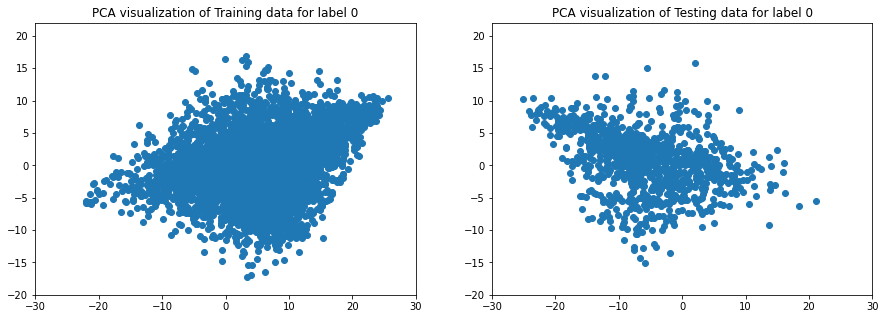

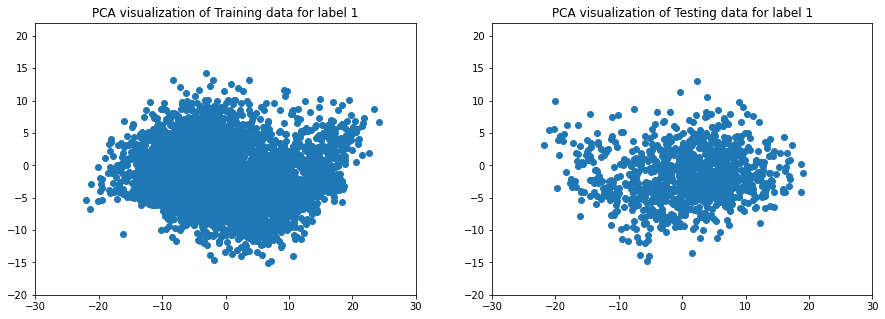

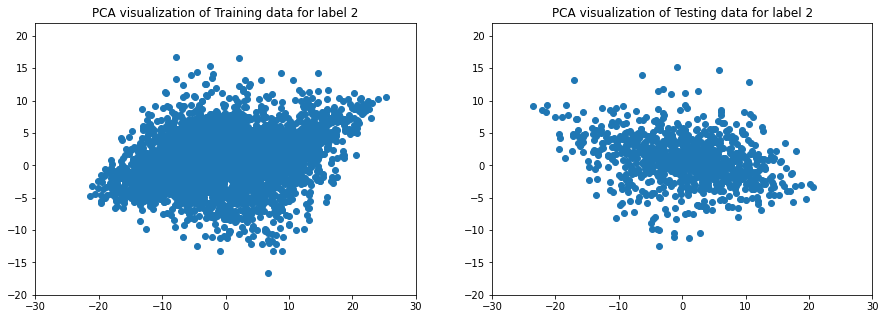

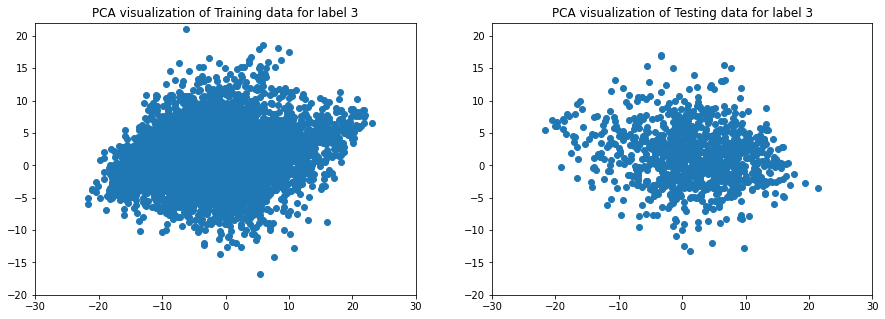

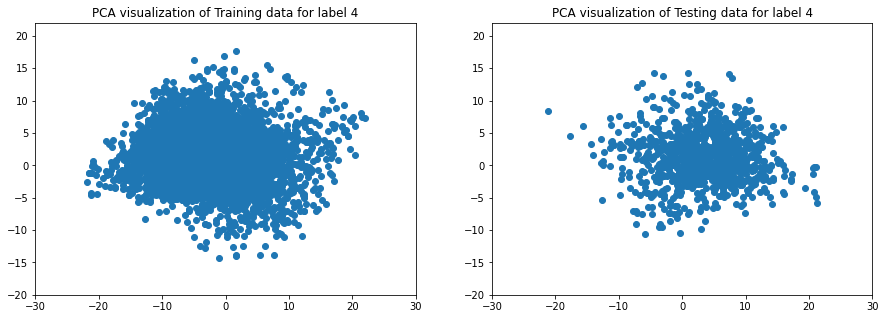

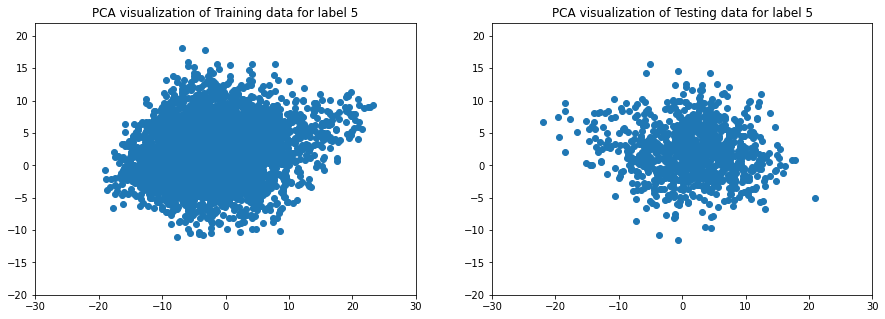

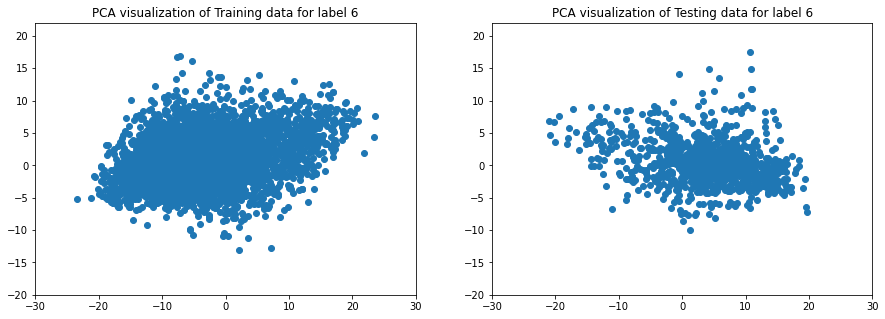

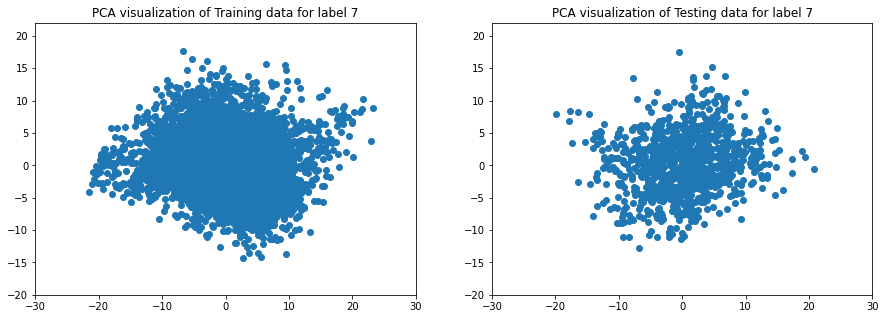

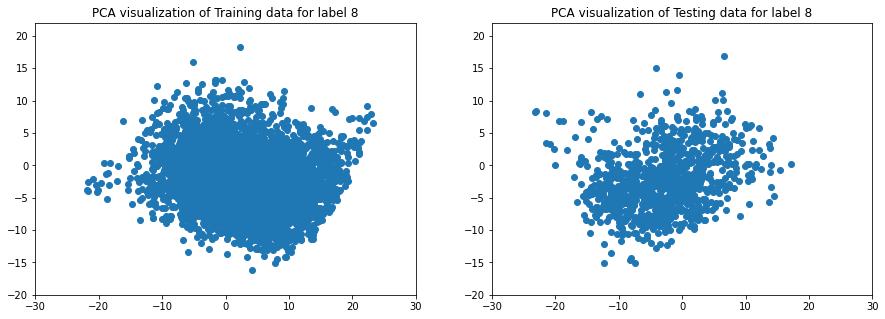

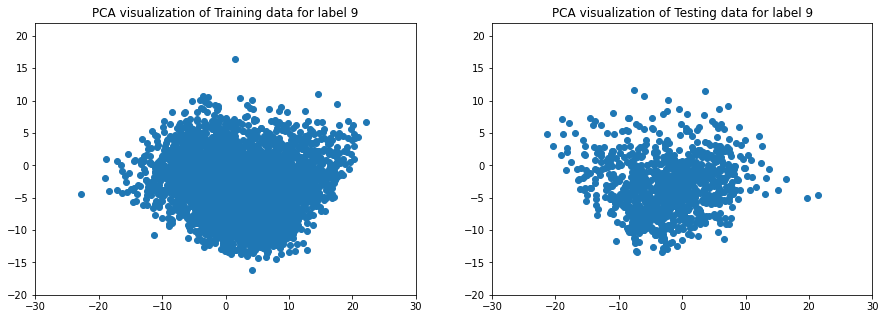

In [ ]:
# Plot of individual classes with the same PCA and equal chart scale
for num in [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]:
    data_pca_train = pca_train[train_df['class'] == num]
    data_pca_test = pca_test[test_df['class'] == num]

    plt.figure(figsize=(15, 5))
    ax1 = plt.subplot(1, 2, 1)
    ax1.scatter(data_pca_train[:, 0], data_pca_train[:, 1])
    ax1.set_title("PCA visualization of Training data for label {}".format(int(num)))

    ax2 = plt.subplot(1, 2, 2)
    ax2.scatter(data_pca_test[:, 0], data_pca_test[:, 1])
    ax2.set_title("PCA visualization of Testing data for label {}".format(int(num)))

    # keep the scale of both pictures the same
    for axis in [ax1, ax2]:
        axis.set_xlim([-30, 30])
        axis.set_ylim([-20, 22])
    plt.show()

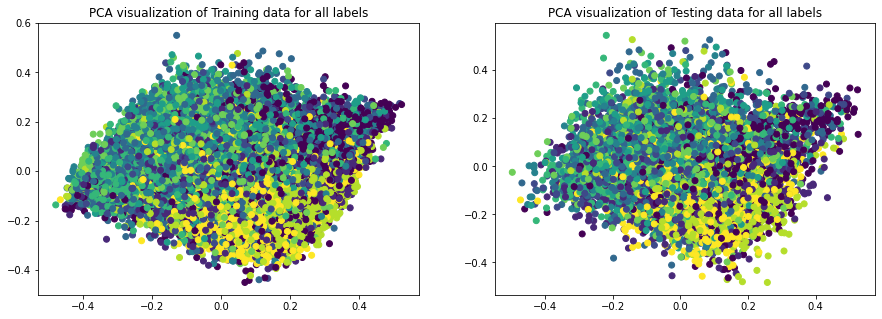

In [ ]:
# Plot of the PCA of all classes, with normalized data
train_df = pd.concat([pd.DataFrame(norm_train_data.T), train_label_df.transpose()], axis=0).transpose()
test_df = pd.concat([pd.DataFrame(norm_test_data.T), test_label_df.transpose()], axis=0).transpose()

pca_train = pca_analysis(train_df[train_df.columns[0:128]], 2)
pca_test = pca_analysis(test_df[test_df.columns[0:128]], 2)
plt.figure(figsize=(15, 5))

ax1 = plt.subplot(1, 2, 1)
ax1.scatter(pca_train[:, 0], pca_train[:, 1], c=train_df['class'])
ax1.set_title("PCA visualization of Training data for all labels (normalized)")

ax2 = plt.subplot(1, 2, 2)
ax2.scatter(pca_test[:, 0], pca_test[:, 1], c=test_df['class'])
ax2.set_title("PCA visualization of Testing data for all labels (normalized)")

plt.show()

## 3. Algorithms / Structures

### 3.1 Mathematical Functions

In [ ]:
# Define functions required for the Multi Layer Perceptron
def he_uniform(input_size=1, output_size=1):
    '''outputs a matrix of size (output_size, input_size) with random initialization'''
    r = np.sqrt(6/input_size)
    return np.random.uniform(-r, r, size=(output_size, input_size)).astype('float32')

### 3.2 Structural Classes

#### 3.2.1 Optimizer (Momentum + Weight Decay)

In [ ]:
# define the momentum optimizer class, the optimiser is passed in to every layer so it can update it's parameters during backprop
class Momentum():
    '''
    A momentum optimizer
    Attributes:
        self.learn_rate
        self.gamma - the momentum parameter that controls the contribution of the previous gradients to current gradient
    '''
    def __init__(self, learn_rate=1e-2, gamma=0.9, decay=0):
        self.learn_rate = learn_rate
        self.gamma = gamma
        self.decay = decay

    def __call__(self, weight, dloss, momentum_term, no_decay=False):
        '''calculate the weight update given the derivative of loss w.r.t. weight and previous momentum_term'''
        change = self.gamma * momentum_term + self.learn_rate * dloss
        if no_decay:
          weight -= change
        else: 
          weight = weight * (1 - self.decay) - change
        return weight, change

#### 3.2.2 Base Layer + Linear Dense Layer

In [ ]:
# define the layer classes we'll use in the model, starting with an abstract base class
class layer(object, metaclass=ABCMeta):
    '''
    Base class for a layer.
    Attributes:
        self.input - the input to the layer
        self.activation - output of the layer (activation and input are for backprop so they can compute back propagation with only the derivative of loss w.r.t. their output)
        layers should define momentum attributes themselves

    Layers must define
        forward(X, train=True): a feed forward function that both returns output and stores it in self.activation. If train=True dropout will be used, and the behaviour of batchnorm changes
        backprop(dloss, optimizer, output_dloss=True): a back propagation function, both updates the weights of the layer and (unless specificied otherwise) returns the losses for the layers inputs 
    '''
    def __init__(self):
        self.input = []
        self.activation = []
    
    @abstractmethod
    def forward(self, X, train=True):
        pass

    @abstractmethod
    def backprop(self, dloss, optimizer, output_dloss=True):
        pass

class linear(layer):
    '''Defines a linear layer, parameters: input size, output size, initializer'''
    def __init__(self, n_input, n_output, initializer=he_uniform):
        super().__init__()
        self.weights = initializer(input_size=n_input, output_size=n_output)
        self.biases = np.zeros((n_output, 1))

        # store momentum terms in the layer, implementing a torch style optimizer class is infeasible
        self.w_momentum = np.zeros((n_output, n_input)) 
        self.b_momentum = np.zeros((n_output, 1))

    def forward(self, X, train=True):
        self.input = X
        self.activation = np.dot(X, self.weights.T) + self.biases.T
        return self.activation.astype('float32')

    def backprop(self, dloss, optimizer, output_dloss=True):
        '''
        backpropagate the linear layer
        parameters:
            dloss: loss of the output (pre relu) of this layer, shape of (batch_size, layer_output_size)
            optimizer: an optimizer class, optimizer(dloss w.r.t. weights , momentum) returns the weight_change

        returns:
            dloss: loss of the output (pre relu) of the previous layer (layer i-1), so long as layer i-1 exists (i.e. i-1 >= 0)
        '''
        assert dloss is not None, "Output deltas not provided"

        # outline dimensions
        batch_size = dloss.shape[0]
        layer_output_size = dloss.shape[1]
        layer_input_size = self.input.shape[-1]
        
        # calculate gradients
        self.input = self.input.reshape(batch_size, layer_input_size) # use reshapes to assert the shape is correct, and indicate shape
        dw = np.dot(dloss.T, self.input).reshape(layer_output_size, layer_input_size)
        # the i,j entry of dw represents the dot product of:
        # the ith row of dloss.T i.e. the derivative of losses for neuron i over all samples
        # the jth column of activation i.e. the input to weight j over all samples
        # so overall: it is (dloss for neuron i * input for weight j of neuron i), giving us the derivative of loss w.r.t weight i,j
        db = np.sum(dloss.T, axis=1).reshape(layer_output_size, 1)
        # output = X*W.T + B so doutput w.r.t db is just 1, hence we only need to sum the gradients for each bias
        
        # calculate gradient of loss w.r.t output of previous layer (if there is a previous layer)
        if output_dloss:
            dloss_prev = np.dot(dloss, self.weights).reshape(batch_size, layer_input_size)
            # the i,j entry of dloss_prev represents the dot product of
            # the ith row of dloss i.e. the dlosses for the ith sample for each of this layers outputs
            # the jth column of W i.e. the jth weight for all output neurons in this layer
            # overall: the sum of (dloss of output neuron k * weight j (the weight that multiplies input j) of output neuron k for sample i)
            # which is the derivative of the loss w.r.t input j for this sample as output = X*W.T + B
        else:
            dloss_prev = None

        # update gradients, with weight decay and momentum 
        self.weights, self.w_momentum = optimizer(self.weights, (1/batch_size) * dw, self.w_momentum)
        self.biases, self.b_momentum = optimizer(self.biases, (1/batch_size) * db, self.b_momentum, no_decay=True)

        return dloss_prev

#### 3.2.3 Batch-Normalised Layer

In [ ]:
class Batchnorm(layer):
    '''implements batch normalization as a parametric layer, requires number of inputs, refer to https://arxiv.org/pdf/1502.03167.pdf for details'''
    def __init__(self, n_input, initializer=he_uniform, epsilon=1e-5, alpha=0.9):
        super().__init__()
        self.n_input = n_input
        self.gamma = np.ones((1, n_input)) # the trainable scalar parameters
        self.beta =  np.zeros((1, n_input)) # the trainable bias parameters
        self.mean =  np.zeros((1, n_input)) # minibatch (or train set) mean
        self.var  =  np.zeros((1, n_input)) # minibatch (or train set) variance
        self.epsilon = epsilon # used to prevent division by 0
        self.g_momentum = np.ones((1, n_input))
        self.b_momentum = np.zeros((1, n_input))

        # the mean and variance for the dataset, estimated using an exponential mean
        self.alpha = alpha
        self.emean = np.zeros((1, n_input))
        self.evar   = np.zeros((1, n_input))

    def forward(self, X, train=True):
        '''forward propagate, also take the exponential mean of mean and variance on the mini batches which will be used in testing'''
        self.input = X
        if train:
            # first calculate several variables, these are reused in backprop so it is useful to store them for later
            self.mean = np.mean(X, axis=0) # the mean of output of each neuron (each column is a neurons output)
            self.var = np.var(X, axis=0)
            self.invdev = np.power(self.var + self.epsilon, -1/2)
            self.inputdifmean = self.input - self.mean

            # update the estimated mean and variance of the entire dataset
            self.emean = self.alpha*self.emean + (1 - self.alpha)*self.mean
            self.evar  = self.alpha*self.evar  + (1 - self.alpha)*self.var

            # perform batchnorm
            self.xhat = (X - self.mean) * np.power(self.var + self.epsilon, -1/2)
        else:
            # perform batchnorm using the estimated mean and variance
            self.xhat = (X - self.emean) * np.power(self.evar + self.epsilon, -1/2)
        
        self.activation = self.gamma * self.xhat + self.beta
        return self.activation

    def backprop(self, dloss, optimizer, output_dloss=True):
        '''backprop, updating the gamma and beta parameters algorithm taken from https://arxiv.org/pdf/1502.03167.pdf '''
        batch_size = dloss.shape[0]

        # note d___ means derivative of loss w.r.t ___
        dxhat = (dloss * self.gamma).reshape(batch_size, self.n_input)
        dvar  = (-1/2) * np.sum(dxhat * (self.inputdifmean)*np.power(self.invdev, 3), axis=0).reshape(1, self.n_input)
        dbias = (np.sum(dxhat*-1*self.invdev, axis=0) + (-2*dvar*np.mean(self.inputdifmean, axis=0))).reshape(1, self.n_input)
        dprev = (dxhat*self.invdev + dvar*(2/batch_size)*self.inputdifmean + dbias/batch_size).reshape(batch_size, self.n_input)
        dgamma = np.sum(dloss * self.xhat, axis=0)
        dbeta = np.sum(dloss)

        # update the trainable parameters
        self.gamma, self.g_momentum = optimizer(self.gamma, (1/batch_size) * dgamma, self.g_momentum)
        self.beta, self.b_momentum = optimizer(self.beta, (1/batch_size) * dbeta, self.b_momentum, no_decay=True)

        return dprev

#### 3.2.4 Dropout Layer

In [ ]:
class Dropout(layer):
    '''implements dropout as a layer (with no parameters)'''
    def __init__(self, drop_prob=0):
        super().__init__()
        self.drop_prob = drop_prob
        self.drop_vector = None # vector of 0 if neuron i is dropped, 1 if neuron i is kept

    def forward(self, X, train=True):
        '''dropout neurons, if train=True'''
        self.input = X
        if train:
            self.drop_vector = (np.random.random((X.shape[1], 1)) > self.drop_prob).astype(int) # a random uniform variable in [0, 1) is < self.drop_prob self.drop_prob % of the time
            self.activation = X*self.drop_vector.T # drop the specified neurons using broadcasting
        else:
            self.activation = X*(1 - self.drop_prob) # the paper says when not using dropout we multiply by the keep prob to keep the overall magnitude of the output the same
        return self.activation.astype('float32')

    def backprop(self, dloss, optimizer, output_dloss=True):
        '''calculate derivative of dropout, this is just zeroing the gradients of the neurons that were dropped'''
        if output_dloss:
            return dloss * self.drop_vector.T

#### 3.2.5 Activation Layers (ReLu + Softmax + Cross Entrophy)

In [ ]:
# define relu and softmax as layers with no parameters, this way the model can be defined entirely with modular layers
class ReLU(layer):
    '''implements relu activation function as a layer (with no parameters)'''
    def __init__(self):
        super().__init__()

    def forward(self, X, train=True):
        self.input = X
        self.activation = np.maximum(self.input, 0)
        return self.activation.astype('float32')

    def backprop(self, dloss, optimizer, output_dloss=True):
        '''this defines the derivative of relu at 0 as 0 to tf.nn.relu()'s standard (which ensures a sparser gradient matrix)'''
        if output_dloss:
            return (self.input > 0).astype(int) * dloss

class Softmax(layer):
    '''implements softmax activation function as a layer (with no parameters)'''
    def __init__(self):
        super().__init__()

    def forward(self, X, train=True):
        '''return the softmax activation of a matrix (each row vector has softmax applied to it)'''
        self.input = X
        X = np.power(np.e, X)

        total = np.sum(X, axis=1).reshape(X.shape[0], 1)
        self.activation = X/total
        return self.activation.astype('float32')

    def backprop(self, dloss, optimizer, output_dloss=True):
        '''
        calculate derivative of softmax activation
        note this function assumes softmax is the output activation, and that dloss is the ground truth labels
        see https://peterroelants.github.io/posts/cross-entropy-softmax/ for an explanation of this derivative
        '''
        if output_dloss:
            return self.activation - dloss

### 3.3 MLP Base Class (>1 hidden layer)

In [ ]:
class MLP:
    ''' 
    Implements a Multi Layer Perceptron, including both the feed-forward phase and backward propagation
    The hidden activation is ReLU, output activation is softmax, and the loss function cross entropy
    Store all parts of the networks in self.layers: an array of Layer classes

    MLP.__init__()
        parameters:
            hidden: an array with the number of neurons for each layer
            input_size: number of inputs
            output_size: number of outputs
            output_act: the activation for the last layer, one of sigmoid or softmax
            momentum_gamma: the momentum term
        
        initializes weight matrices with shape (output_size, input_size) to match Pytorch's standard
    '''
    def __init__(self, 
                 hidden=[1], input_size=1, output_size=1, 
                 learn_rate=1e-2, weight_decay=1e-3, momentum_gamma=0.9, batch_norm=False,
                 dropout_rate=0, initializer=he_uniform): ####
        '''initialize the layers, optimizer and other hyperparameters'''
        self.batch_norm = batch_norm
        self.dropout_rate = dropout_rate
        
        self.optimizer = Momentum(learn_rate=learn_rate, gamma=momentum_gamma, decay=weight_decay)

        self.layers = [] # this stores linear, activation functions, dropout and batchnorm as layers
        for i, (input_size_i, output_size_i) in enumerate(zip([input_size] + hidden, hidden + [output_size])):
            self.layers.append(linear(input_size_i, output_size_i, initializer=initializer))
            if i == len(hidden): # use softmax activation in last layer
                self.layers.append(Softmax())
            else:
                self.layers.append(ReLU())
                if dropout_rate > 0:
                    self.layers.append(Dropout(drop_prob=dropout_rate))
                if batch_norm: # we use batchnorm after the activation because it empirically gives better results
                    self.layers.append(Batchnorm(output_size_i, initializer=initializer))               

    def forward(self, X, train=True):
        '''
        calculate output of the network
        
        parameters:
            X: the input matrix of shape (batch_size, input_size)
            train: if True the model will use dropout, also affects batchnorm

        returns:
            yhat: the prediction matrix of shape (batch_size, output_size)
        '''
        for layer in self.layers:
            X = layer.forward(X, train=train)
        return X

    def backprop(self, y):
        '''given the true outputs y perform one step of gradient descent using the predictions of the current batch as yhat'''
        dloss = y # the softmax layer expects the ground truth to be passed in
        for layer in reversed(self.layers[1:]): # backprop until the first layer
            dloss = layer.backprop(dloss, self.optimizer)
        layer.backprop(dloss, self.optimizer, output_dloss=False) # to save time don't calculate the loss on the training data

    def __repr__(self):
        return self.layers.__repr__()

## 4. Experiments

### 4.1 All Experiment Settings (Table)

To conduct and record experiments in a trackable manner, we created a table with log Id as follows:

| LogID | hidden | epoch | batch size | learning rate | weight decay | momentum | dropout | batch norm |
|:--|:---------|:---|:---|:---|:---|:---|:---|:---|
| 0 | [64, 32] | 50 | 128 | 1e-3 | 0 | 0 | 0 | False |
| 0_1 | [64, 32] | 50 | 128 | 1e-3 | 0 | 0.9 | 0 | False |
| 1 | [128, 64] | 50 | 128 | 1e-3 | 0 | 0 | 0 | False |
| 1_1 | [128] | 50 | 128 | 1e-3 | 0 | 0 | 0 | False |
| 2 | [256, 128] | 50 | 128 | 1e-3 | 0 | 0 | 0 | False |
| 2_1 | [256] | 50 | 128 | 1e-3 | 0 | 0 | 0 | False |
| 2_2 | [512] | 50 | 128 | 1e-3 | 0 | 0 | 0 | False |
| 2_3 | [512, 256] | 50 | 128 | 1e-3 | 0 | 0 | 0 | False |
| 2_4 | [1024] | 50 | 128 | 1e-3 | 0 | 0 | 0 | False |
| 3 | [256, 128] | 50 | 64 | 1e-3 | 0 | 0 | 0 | False |
| 3_1 | [256, 128] | 50 | 32 | 1e-3 | 0 | 0 | 0 | False |
| 3_2 | [256, 128] | 50 | 16 | 1e-3 | 0 | 0 | 0 | False |
| 4 | [256, 128] | 50 | 256 | 1e-3 | 0 | 0 | 0 | False |
| 5 | [64, 32] | 50 | 1 | 1e-3 | 0 | 0 | 0 | False |
| 6 | [256, 128] | 50 | 64 | 1e-3 | 0 | 0.9 | 0 | False |
| 7 | [256, 128] | 50 | 64 | 1e-3 | 0 | 0.95 | 0 | False |
| 8 | [256, 128] | 50 | 64 | 1e-3 | 0 | 0.5 | 0 | False |
| 9 | [256, 128] | 50 | 64 | 1e-3 | 1e-4 | 0.9 | 0 | False |
| 9_1 | [256, 128] | 50 | 64 | 1e-2 | 1e-4 | 0.9 | 0 | False |
| 10 | [256, 128] | 50 | 64 | 1e-3 | 1e-3 | 0.9 | 0 | False |
| 10_1 | [256, 128] | 50 | 64 | 1e-3 | 1e-5 | 0.9 | 0 | False |
| 11 | [256, 128] | 50 | 64 | 1e-3 | 0 | 0.9 | 0.2 | False |
| 12 | [256, 128] | 50 | 64 | 1e-3 | 0 | 0.9 | 0.3 | False |
| 12_1 | [256, 128] | 50 | 64 | 1e-3 | 0 | 0.9 | 0.1 | False |
| 13 | [256, 128] | 50 | 64 | 1e-3 | 0 | 0.95 | 0.2 | False |
| 13_1 | [256, 128] | 50 | 64 | 1e-3 | 0 | 0.95 | 0.1 | False |
| 14 | [256, 128] | 50 | 64 | 1e-3 | 0 | 0.9 | 0 | True |
| 15 | [64, 32] | 50 | 1 | 1e-3 | 0 | 0.9 | 0 | False |
| 16 | [256, 128] | 50 | 64 | 1e-3 | 1e-4 | 0.9 | 0.1 | True |
| 16_1 | [256, 128] | 50 | 64 | 1e-3 | 1e-4 | 0.95 | 0.1 | True |
| 17 | [256, 128] | 50 | 64 | 1e-3 | 1e-4 | 0.9 | 0 | True |
| 17_1 | [256, 128, 64] | 50 | 64 | 1e-3 | 1e-4 | 0.9 | 0 | True |
| 17_2 | [512, 128] | 50 | 64 | 1e-3 | 1e-4 | 0.9 | 0 | True |
| 17_3* | [512, 256] | 50 | 64 | 1e-3 | 1e-4 | 0.9 | 0 | True |
| 17_4 | [512, 256]  | 50 | 32 | 1e-3 | 1e-4 | 0.9 | 0 | True |
| 17_5 | [1024] | 50 | 64 | 1e-3 | 1e-4 | 0.9 | 0 | True |
| 18 | [256, 128] | 50 | 64 | 1e-3 | 0 | 0.9 | 0.2 | True |
| 19 | [256] | 50 | 64 | 1e-3 | 1e-4 | 0.9 | 0 | True |

### 4.2 Experiment Codes

#### 4.2.1 Base Function for experiment (Mini-Batch Training)

In [ ]:
def accuracy(y_hat, y):
    '''
    calculate the accuracy for the given one-hot predictions and data labels
    '''
    preds = np.argmax(y_hat, axis=1)
    labels = np.argmax(y, axis=1)
    return np.mean(preds == labels)

def fpr(y,pred,th):
    '''
    calculate the False positive rate for the given one-hot predictions and data labels
    '''
    pred_t = (pred >= th)
    fp = np.sum((pred_t == True) & (y == 0))
    tn = np.sum((pred_t == False) & (y == 0))
    return fp/(tn+fp)

def recall(y,pred,th):
    '''
    calculate the Recall for the given one-hot predictions and data labels
    '''
    pred_t = (pred >= th)
    tp = np.sum((pred_t == True) & (y == 1))
    fn = np.sum((pred_t == False) & (y == 1))
    return tp/(tp+fn)

def auc_score(labels, pred, debug=False):
    '''
    calculate the macro roc_auc score for the given one-hot predictions and data labels
    '''
    TPR, FPR = np.array([]), np.array([])
    th_div = 2e-4
    thres = np.arange(1.0+th_div, th_div, -th_div)
    aucs = []
    for i in range(10): 
      TPR, FPR = np.array([]), np.array([]) 
      for th in thres:
          # true positive rate is the same to recall
          TPR = np.append(TPR, recall(labels[:, i],pred[:, i],th))
          FPR = np.append(FPR, fpr(labels[:, i],pred[:, i],th))
      TPR = TPR/TPR[-1]
      FPR = FPR/FPR[-1]
      # direct calculation of AUC using trapezoid by numpy
      aucs.append(np.trapz(TPR, FPR)) 
    if debug: return aucs
    return np.mean(aucs)

def experiment(hid=[128], ep=50, bs=128, lr=1e-3, wd=0, m=0.9, dr=0, bn=False):
    '''
    the packed codes for experimenting the mlp, in order to better display the hyperparameters
    '''
    mlp = MLP(hidden=hid, input_size=128, output_size=10, learn_rate=lr, weight_decay=wd, 
              momentum_gamma=m, batch_norm=bn, dropout_rate=dr)
    
    train_acc_log = []
    test_acc_log = []
    time_log = []
    X = train_x
    y = train_y

    start_t = time.time()
    for epo in range(ep):
        epo_start = time.time()
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices) # shuffle the trainning data for each 
        X = X[indices, :]
        y = y[indices, :]

        for batch in range(int(X.shape[0]/bs)):
            batch_x = X[batch*bs:(batch+1)*bs]
            batch_y = y[batch*bs:(batch+1)*bs]
            preds = mlp.forward(batch_x)
            mlp.backprop(batch_y)

        train_acc = accuracy(mlp.forward(X, train=False), y)
        test_acc = accuracy(mlp.forward(test_x, train=False), test_y)
        epo_time = time.time() - epo_start
        time_log.append(epo_time)
        train_acc_log.append(train_acc)
        test_acc_log.append(test_acc)
        if epo % 5 == 0:
            print("Epoch {:04d}\tTrain Accuracy: {:.4f}\tTest Accuracy: {:.4f}\t{:.2f}s for this epoch"
            .format(epo, train_acc, test_acc, epo_time))
    print('-------')
    print('Final:\t\tTrain Accuracy: {:.4f}\tTest Accuracy: {:.4f}\n\t\tOverall time {:.2f}s\tAve {:.2f}s for each epoch'
    .format(train_acc, test_acc, time.time()-start_t, np.mean(time_log)))

    log = (mlp, train_acc_log, test_acc_log, time_log)
    return log

def full_evaluate(mlp):
    '''
    evaluate the given mlp using Precisions, Recalls, Accuracy and F1-score
    '''
    
    preds = np.argmax(mlp.forward(test_x, train=False), axis=1)
    labels = np.argmax(test_y, axis=1)
    precisions, recalls, f1s = [], [], []

    print('\n\t\t--- The Performance for Each Label ---')
    print('Label\t\tPrecision\tRecall\t\tF1-Score')
    for label in np.unique(preds):
        TP = len([preds[x] for x in range(len(preds)) if preds[x] == labels[x] and preds[x] == label]) 
        TN = len([preds[x] for x in range(len(preds)) if preds[x] == labels[x] and preds[x] != label])
        FP = len([preds[x] for x in range(len(preds)) if labels[x] != label and preds[x] == label])
        FN = len([preds[x] for x in range(len(preds)) if labels[x] == label and preds[x] != label])
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        if precision + recall == 0: f1 = 0
        else: f1 = 2 * precision * recall / (precision + recall)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
        print('{}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}'
            .format(label, precision, recall, f1))
    
    AUC_score = auc_score(test_y, mlp.forward(test_x, train=False))
    # since all labels distribute evenly in test data (1k for each label), we use macro-avg here
    
    print('\t\t------- The Overall Performace -------')
    print('Macro-Avg\t{:.4f}\t\t{:.4f}\t\t{:.4f}'
        .format(np.mean(precisions), np.mean(recalls), np.mean(f1s)))
    print('Accuracy:\t{:.4f}\t\tAUC Score:\t{:.4f}'.format(np.mean(preds == labels), AUC_score))

#### 4.2.2 The Best Performing Experiment

__The Ablation Study__

| Model | Test Acc | Recall | Precision | F1-Score | AUC Score | time per epoch(s) | Train Acc
|:-----------|:------|:------|:------|:------|:-----|:------|:---|
| Full Net - [512, 256] | __53.36__ | __53.36__ | __53.37__ | __53.17__ | 0.8832 | 8.40 | 69.12 |
| w/o momentum | 37.61 | 37.61 | 36.20 | 35.22 | 0.8089 | 8.57 | 37.32 |
| w/o weight decay | 45.98 | 45.98 | 45.75 | 45.60 | 0.7894 | 9.11 | 70.81 |
| w/o Batch Norm | 51.48 | 51.48 | 51.10 | 51.01 | 0.8664 | 7.00 | 55.73 |
| Full Net - [256, 256] | 50.87 | 50.87 | 50.54 | 50.54 | 0.8796 | 5.74 | 62.65 |
| Full Net - [512] | 42.84 | 42.84 | 42.21 | 42.29 | 0.8368 | __3.60__ | 43.13 |
| b/s = 128 (2x) | 51.84 | 51.84 | 51.63 | 51.61 | 0.7563 | 7.75 | __80.11__ |
| b/s = 32 (1/2x) | 51.87 | 51.87 | 52.39 | 51.40 | __0.8847__ | 12.47 | 59.34 |


In [ ]:
# The Full model
epoch = 50
batch_size = 64
hidden = [512, 256]
learning_rate = 1e-3
weight_decay = 1e-4
momentum_gamma = 0.9
dropout_rate = 0
batch_norm = True

output_log = experiment(hid=hidden, ep=epoch, bs=batch_size, lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

full_evaluate(output_log[0])

Epoch 0000	Train Accuracy: 0.3588	Test Accuracy: 0.3368	8.83s for this epoch
Epoch 0005	Train Accuracy: 0.5143	Test Accuracy: 0.4584	7.71s for this epoch
Epoch 0010	Train Accuracy: 0.5897	Test Accuracy: 0.4970	7.63s for this epoch
Epoch 0015	Train Accuracy: 0.6400	Test Accuracy: 0.5060	7.67s for this epoch
Epoch 0020	Train Accuracy: 0.6666	Test Accuracy: 0.5099	7.66s for this epoch
Epoch 0025	Train Accuracy: 0.7032	Test Accuracy: 0.5267	7.67s for this epoch
Epoch 0030	Train Accuracy: 0.7066	Test Accuracy: 0.5254	7.60s for this epoch
Epoch 0035	Train Accuracy: 0.7042	Test Accuracy: 0.5328	7.56s for this epoch
Epoch 0040	Train Accuracy: 0.7070	Test Accuracy: 0.5268	7.63s for this epoch
Epoch 0045	Train Accuracy: 0.7125	Test Accuracy: 0.5311	7.69s for this epoch
-------
Final:		Train Accuracy: 0.7011	Test Accuracy: 0.5257
		Overall time 383.98s	Ave 7.68s for each epoch

		--- The Performance for Each Label ---
Label		Precision	Recall		F1-Score
0		0.6098		0.6000		0.6048
1		0.6396		0.6390		

In [ ]:
print('The time taken {:.2f}s'.format(time.time() - S_t))

the time taken 407.23s


#### 4.2.3 All Experiments

In [ ]:
# Ablation 1: without momentum
epoch = 50
batch_size = 64
hidden = [512, 256]
learning_rate = 1e-3
weight_decay = 1e-4
momentum_gamma = 0
dropout_rate = 0
batch_norm = True

output_log1 = experiment(hid=hidden, ep=epoch, bs=batch_size, lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

full_evaluate(output_log1[0])

Epoch 0000	Train Accuracy: 0.2622	Test Accuracy: 0.2610	9.21s for this epoch
Epoch 0005	Train Accuracy: 0.3902	Test Accuracy: 0.3832	8.91s for this epoch
Epoch 0010	Train Accuracy: 0.4092	Test Accuracy: 0.4080	8.97s for this epoch
Epoch 0015	Train Accuracy: 0.4098	Test Accuracy: 0.4088	9.02s for this epoch
Epoch 0020	Train Accuracy: 0.4094	Test Accuracy: 0.4092	8.99s for this epoch
Epoch 0025	Train Accuracy: 0.4114	Test Accuracy: 0.4127	8.93s for this epoch
Epoch 0030	Train Accuracy: 0.4134	Test Accuracy: 0.4128	8.84s for this epoch
Epoch 0035	Train Accuracy: 0.4088	Test Accuracy: 0.4072	8.83s for this epoch
Epoch 0040	Train Accuracy: 0.3985	Test Accuracy: 0.3966	8.65s for this epoch
Epoch 0045	Train Accuracy: 0.3887	Test Accuracy: 0.3876	8.86s for this epoch
-------
Final:		Train Accuracy: 0.3798	Test Accuracy: 0.3803
		Overall time 446.86s	Ave 8.94s for each epoch
		--- The Performance for Each Label ---
Label		Precision	Recall		F1-Score
0		0.4316		0.4420		0.4368
1		0.4450		0.4330		0

In [ ]:
# Ablation 2: without decay
epoch = 50
batch_size = 64
hidden = [512, 256]
learning_rate = 1e-3
weight_decay = 0
momentum_gamma = 0.9
dropout_rate = 0
batch_norm = True

output_log2 = experiment(hid=hidden, ep=epoch, bs=batch_size, lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

full_evaluate(output_log2[0])

Epoch 0000	Train Accuracy: 0.3530	Test Accuracy: 0.3401	8.34s for this epoch
Epoch 0005	Train Accuracy: 0.4459	Test Accuracy: 0.4034	8.18s for this epoch
Epoch 0010	Train Accuracy: 0.4938	Test Accuracy: 0.4224	8.21s for this epoch
Epoch 0015	Train Accuracy: 0.5336	Test Accuracy: 0.4425	8.20s for this epoch
Epoch 0020	Train Accuracy: 0.5685	Test Accuracy: 0.4588	7.98s for this epoch
Epoch 0025	Train Accuracy: 0.6062	Test Accuracy: 0.4516	7.93s for this epoch
Epoch 0030	Train Accuracy: 0.6131	Test Accuracy: 0.4521	7.76s for this epoch
Epoch 0035	Train Accuracy: 0.6570	Test Accuracy: 0.4737	7.74s for this epoch
Epoch 0040	Train Accuracy: 0.6730	Test Accuracy: 0.4716	8.26s for this epoch
Epoch 0045	Train Accuracy: 0.7020	Test Accuracy: 0.4662	8.22s for this epoch
-------
Final:		Train Accuracy: 0.7287	Test Accuracy: 0.4828
		Overall time 403.32s	Ave 8.07s for each epoch
		--- The Performance for Each Label ---
Label		Precision	Recall		F1-Score
0		0.5559		0.6070		0.5803
1		0.5802		0.6040		0

In [ ]:
# Ablation 3: without BN
epoch = 50
batch_size = 64
hidden = [512, 256]
learning_rate = 1e-3
weight_decay = 1e-4
momentum_gamma = 0.9
dropout_rate = 0
batch_norm = False

output_log3 = experiment(hid=hidden, ep=epoch, bs=batch_size, lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

full_evaluate(output_log3[0])

Epoch 0000	Train Accuracy: 0.3904	Test Accuracy: 0.3902	6.76s for this epoch
Epoch 0005	Train Accuracy: 0.4814	Test Accuracy: 0.4615	6.72s for this epoch
Epoch 0010	Train Accuracy: 0.5018	Test Accuracy: 0.4792	6.72s for this epoch
Epoch 0015	Train Accuracy: 0.5167	Test Accuracy: 0.4838	6.82s for this epoch
Epoch 0020	Train Accuracy: 0.5291	Test Accuracy: 0.4930	6.69s for this epoch
Epoch 0025	Train Accuracy: 0.5372	Test Accuracy: 0.5012	6.86s for this epoch
Epoch 0030	Train Accuracy: 0.5431	Test Accuracy: 0.5043	6.98s for this epoch
Epoch 0035	Train Accuracy: 0.5471	Test Accuracy: 0.5057	6.98s for this epoch
Epoch 0040	Train Accuracy: 0.5521	Test Accuracy: 0.5083	6.88s for this epoch
Epoch 0045	Train Accuracy: 0.5536	Test Accuracy: 0.5119	6.90s for this epoch
-------
Final:		Train Accuracy: 0.5577	Test Accuracy: 0.5133
		Overall time 352.58s	Ave 7.05s for each epoch
		--- The Performance for Each Label ---
Label		Precision	Recall		F1-Score
0		0.6035		0.5480		0.5744
1		0.6454		0.6170		0

In [ ]:
# Ablation 4: narrower net
epoch = 50
batch_size = 64
hidden = [256, 256]
learning_rate = 1e-3
weight_decay = 1e-4
momentum_gamma = 0.9
dropout_rate = 0
batch_norm = True

output_log4 = experiment(hid=hidden, ep=epoch, bs=batch_size, lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

full_evaluate(output_log4[0])

Epoch 0000	Train Accuracy: 0.3589	Test Accuracy: 0.3431	6.00s for this epoch
Epoch 0005	Train Accuracy: 0.4759	Test Accuracy: 0.4376	5.60s for this epoch
Epoch 0010	Train Accuracy: 0.5449	Test Accuracy: 0.4709	5.73s for this epoch
Epoch 0015	Train Accuracy: 0.5892	Test Accuracy: 0.4906	5.74s for this epoch
Epoch 0020	Train Accuracy: 0.6193	Test Accuracy: 0.5013	5.70s for this epoch
Epoch 0025	Train Accuracy: 0.6350	Test Accuracy: 0.5069	5.71s for this epoch
Epoch 0030	Train Accuracy: 0.6405	Test Accuracy: 0.5118	5.60s for this epoch
Epoch 0035	Train Accuracy: 0.6432	Test Accuracy: 0.5159	5.66s for this epoch
Epoch 0040	Train Accuracy: 0.6363	Test Accuracy: 0.5164	5.66s for this epoch
Epoch 0045	Train Accuracy: 0.6290	Test Accuracy: 0.5138	5.76s for this epoch
-------
Final:		Train Accuracy: 0.6359	Test Accuracy: 0.5229
		Overall time 285.44s	Ave 5.71s for each epoch
		--- The Performance for Each Label ---
Label		Precision	Recall		F1-Score
0		0.6038		0.6020		0.6029
1		0.6228		0.6440		0

In [ ]:
# Ablation 5: shallow net
epoch = 50
batch_size = 64
hidden = [512]
learning_rate = 1e-3
weight_decay = 1e-4
momentum_gamma = 0.9
dropout_rate = 0
batch_norm = True

output_log5 = experiment(hid=hidden, ep=epoch, bs=batch_size, lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

full_evaluate(output_log5[0])

Epoch 0000	Train Accuracy: 0.3474	Test Accuracy: 0.3313	3.74s for this epoch
Epoch 0005	Train Accuracy: 0.4065	Test Accuracy: 0.3844	3.66s for this epoch
Epoch 0010	Train Accuracy: 0.4441	Test Accuracy: 0.4235	3.57s for this epoch
Epoch 0015	Train Accuracy: 0.4687	Test Accuracy: 0.4442	3.51s for this epoch
Epoch 0020	Train Accuracy: 0.4770	Test Accuracy: 0.4518	3.54s for this epoch
Epoch 0025	Train Accuracy: 0.4736	Test Accuracy: 0.4524	3.56s for this epoch
Epoch 0030	Train Accuracy: 0.4695	Test Accuracy: 0.4548	3.54s for this epoch
Epoch 0035	Train Accuracy: 0.4616	Test Accuracy: 0.4515	3.61s for this epoch
Epoch 0040	Train Accuracy: 0.4499	Test Accuracy: 0.4434	3.54s for this epoch
Epoch 0045	Train Accuracy: 0.4350	Test Accuracy: 0.4339	3.64s for this epoch
-------
Final:		Train Accuracy: 0.4354	Test Accuracy: 0.4330
		Overall time 179.28s	Ave 3.59s for each epoch
		--- The Performance for Each Label ---
Label		Precision	Recall		F1-Score
0		0.5005		0.4990		0.4997
1		0.4724		0.5050		0

In [ ]:
# Ablation 6: 2 x batch size
epoch = 50
batch_size = 128
hidden = [512, 256]
learning_rate = 1e-3
weight_decay = 1e-4
momentum_gamma = 0.9
dropout_rate = 0
batch_norm = True

output_log6 = experiment(hid=hidden, ep=epoch, bs=batch_size, lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

full_evaluate(output_log6[0])

Epoch 0000	Train Accuracy: 0.3858	Test Accuracy: 0.3611	7.88s for this epoch
Epoch 0005	Train Accuracy: 0.4822	Test Accuracy: 0.4337	7.85s for this epoch
Epoch 0010	Train Accuracy: 0.5378	Test Accuracy: 0.4688	7.73s for this epoch
Epoch 0015	Train Accuracy: 0.5939	Test Accuracy: 0.4918	7.70s for this epoch
Epoch 0020	Train Accuracy: 0.6374	Test Accuracy: 0.4962	7.70s for this epoch
Epoch 0025	Train Accuracy: 0.6869	Test Accuracy: 0.5062	7.81s for this epoch
Epoch 0030	Train Accuracy: 0.7178	Test Accuracy: 0.5074	7.81s for this epoch
Epoch 0035	Train Accuracy: 0.7445	Test Accuracy: 0.5175	7.69s for this epoch
Epoch 0040	Train Accuracy: 0.7682	Test Accuracy: 0.5178	7.65s for this epoch
Epoch 0045	Train Accuracy: 0.7874	Test Accuracy: 0.5118	7.68s for this epoch
-------
Final:		Train Accuracy: 0.7983	Test Accuracy: 0.5214
		Overall time 395.15s	Ave 7.90s for each epoch
		--- The Performance for Each Label ---
Label		Precision	Recall		F1-Score
0		0.6250		0.6000		0.6122
1		0.6290		0.6460		0

In [ ]:
# Ablation 7: 1/2 batch size
epoch = 50
batch_size = 32
hidden = [512, 256]
learning_rate = 1e-3
weight_decay = 1e-4
momentum_gamma = 0.9
dropout_rate = 0
batch_norm = True

output_log7 = experiment(hid=hidden, ep=epoch, bs=batch_size, lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

full_evaluate(output_log7[0])

Epoch 0000	Train Accuracy: 0.3666	Test Accuracy: 0.3567	12.30s for this epoch
Epoch 0005	Train Accuracy: 0.5145	Test Accuracy: 0.4627	12.32s for this epoch
Epoch 0010	Train Accuracy: 0.5903	Test Accuracy: 0.5079	12.25s for this epoch
Epoch 0015	Train Accuracy: 0.6056	Test Accuracy: 0.5164	12.29s for this epoch
Epoch 0020	Train Accuracy: 0.6096	Test Accuracy: 0.5199	12.39s for this epoch
Epoch 0025	Train Accuracy: 0.5959	Test Accuracy: 0.5176	12.41s for this epoch
Epoch 0030	Train Accuracy: 0.5937	Test Accuracy: 0.5249	12.39s for this epoch
Epoch 0035	Train Accuracy: 0.5954	Test Accuracy: 0.5234	12.27s for this epoch
Epoch 0040	Train Accuracy: 0.5902	Test Accuracy: 0.5141	12.32s for this epoch
Epoch 0045	Train Accuracy: 0.5952	Test Accuracy: 0.5239	12.32s for this epoch
-------
Final:		Train Accuracy: 0.5934	Test Accuracy: 0.5187
		Overall time 623.28s	Ave 12.47s for each epoch
		--- The Performance for Each Label ---
Label		Precision	Recall		F1-Score
0		0.6281		0.5640		0.5943
1		0.6428

In [ ]:
### log0
epoch = 50
batch_size = 128
hidden = [64, 32]
learning_rate = 1e-3
weight_decay = 0
momentum_gamma = 0
dropout_rate = 0
batch_norm = False

log0 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.1236	Test Accuracy: 0.1228	0.57s for this epoch
Epoch 0005	Train Accuracy: 0.1937	Test Accuracy: 0.1967	0.57s for this epoch
Epoch 0010	Train Accuracy: 0.2186	Test Accuracy: 0.2232	0.58s for this epoch
Epoch 0015	Train Accuracy: 0.2359	Test Accuracy: 0.2417	0.57s for this epoch
Epoch 0020	Train Accuracy: 0.2495	Test Accuracy: 0.2530	0.58s for this epoch
Epoch 0025	Train Accuracy: 0.2616	Test Accuracy: 0.2629	0.59s for this epoch
Epoch 0030	Train Accuracy: 0.2715	Test Accuracy: 0.2703	0.58s for this epoch
Epoch 0035	Train Accuracy: 0.2799	Test Accuracy: 0.2789	0.58s for this epoch
Epoch 0040	Train Accuracy: 0.2874	Test Accuracy: 0.2870	0.59s for this epoch
Epoch 0045	Train Accuracy: 0.2948	Test Accuracy: 0.2941	0.57s for this epoch
-------
Final:		Train Accuracy: 0.2995	Test Accuracy: 0.2989
		Overall time 29.21s	Ave 0.58s for each epoch


In [ ]:
### log0_1 with momentum to compare with 15 & 5
epoch = 50
batch_size = 128
hidden = [64, 32]
learning_rate = 1e-3
weight_decay = 0
momentum_gamma = 0.9
dropout_rate = 0
batch_norm = False

log0_1 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.2342	Test Accuracy: 0.2350	0.58s for this epoch
Epoch 0005	Train Accuracy: 0.3185	Test Accuracy: 0.3259	0.60s for this epoch
Epoch 0010	Train Accuracy: 0.3416	Test Accuracy: 0.3438	0.58s for this epoch
Epoch 0015	Train Accuracy: 0.3518	Test Accuracy: 0.3535	0.59s for this epoch
Epoch 0020	Train Accuracy: 0.3599	Test Accuracy: 0.3569	0.59s for this epoch
Epoch 0025	Train Accuracy: 0.3654	Test Accuracy: 0.3638	0.58s for this epoch
Epoch 0030	Train Accuracy: 0.3704	Test Accuracy: 0.3661	0.58s for this epoch
Epoch 0035	Train Accuracy: 0.3740	Test Accuracy: 0.3710	0.57s for this epoch
Epoch 0040	Train Accuracy: 0.3778	Test Accuracy: 0.3716	0.59s for this epoch
Epoch 0045	Train Accuracy: 0.3800	Test Accuracy: 0.3740	0.59s for this epoch
-------
Final:		Train Accuracy: 0.3828	Test Accuracy: 0.3768
		Overall time 29.55s	Ave 0.59s for each epoch


In [ ]:
### log1
epoch = 50
batch_size = 128
hidden = [128, 64]
learning_rate = 1e-3
weight_decay = 0
momentum_gamma = 0
dropout_rate = 0
batch_norm = False

log1 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.1479	Test Accuracy: 0.1476	1.02s for this epoch
Epoch 0005	Train Accuracy: 0.2329	Test Accuracy: 0.2383	1.03s for this epoch
Epoch 0010	Train Accuracy: 0.2677	Test Accuracy: 0.2729	1.01s for this epoch
Epoch 0015	Train Accuracy: 0.2892	Test Accuracy: 0.2925	0.98s for this epoch
Epoch 0020	Train Accuracy: 0.3053	Test Accuracy: 0.3070	0.99s for this epoch
Epoch 0025	Train Accuracy: 0.3169	Test Accuracy: 0.3191	0.98s for this epoch
Epoch 0030	Train Accuracy: 0.3267	Test Accuracy: 0.3265	1.00s for this epoch
Epoch 0035	Train Accuracy: 0.3340	Test Accuracy: 0.3339	0.98s for this epoch
Epoch 0040	Train Accuracy: 0.3409	Test Accuracy: 0.3400	0.99s for this epoch
Epoch 0045	Train Accuracy: 0.3467	Test Accuracy: 0.3450	0.98s for this epoch
-------
Final:		Train Accuracy: 0.3503	Test Accuracy: 0.3493
		Overall time 49.97s	Ave 1.00s for each epoch


In [ ]:
### log1_1
epoch = 50
batch_size = 128
hidden = [128]
learning_rate = 1e-3
weight_decay = 0
momentum_gamma = 0
dropout_rate = 0
batch_norm = False

log1_1 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.1276	Test Accuracy: 0.1249	0.68s for this epoch
Epoch 0005	Train Accuracy: 0.2127	Test Accuracy: 0.2085	0.65s for this epoch
Epoch 0010	Train Accuracy: 0.2564	Test Accuracy: 0.2539	0.64s for this epoch
Epoch 0015	Train Accuracy: 0.2838	Test Accuracy: 0.2838	0.65s for this epoch
Epoch 0020	Train Accuracy: 0.3022	Test Accuracy: 0.3022	0.66s for this epoch
Epoch 0025	Train Accuracy: 0.3164	Test Accuracy: 0.3158	0.65s for this epoch
Epoch 0030	Train Accuracy: 0.3272	Test Accuracy: 0.3249	0.64s for this epoch
Epoch 0035	Train Accuracy: 0.3354	Test Accuracy: 0.3350	0.63s for this epoch
Epoch 0040	Train Accuracy: 0.3424	Test Accuracy: 0.3391	0.65s for this epoch
Epoch 0045	Train Accuracy: 0.3473	Test Accuracy: 0.3442	0.65s for this epoch
-------
Final:		Train Accuracy: 0.3514	Test Accuracy: 0.3486
		Overall time 32.53s	Ave 0.65s for each epoch


In [ ]:
### log2
epoch = 50
batch_size = 128
hidden = [256, 128]
learning_rate = 1e-3
weight_decay = 0
momentum_gamma = 0
dropout_rate = 0
batch_norm = False

log2 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.1755	Test Accuracy: 0.1720	2.18s for this epoch
Epoch 0005	Train Accuracy: 0.2783	Test Accuracy: 0.2778	2.06s for this epoch
Epoch 0010	Train Accuracy: 0.3164	Test Accuracy: 0.3137	2.09s for this epoch
Epoch 0015	Train Accuracy: 0.3402	Test Accuracy: 0.3340	2.06s for this epoch
Epoch 0020	Train Accuracy: 0.3542	Test Accuracy: 0.3488	2.05s for this epoch
Epoch 0025	Train Accuracy: 0.3663	Test Accuracy: 0.3579	2.06s for this epoch
Epoch 0030	Train Accuracy: 0.3755	Test Accuracy: 0.3664	2.05s for this epoch
Epoch 0035	Train Accuracy: 0.3835	Test Accuracy: 0.3702	2.08s for this epoch
Epoch 0040	Train Accuracy: 0.3910	Test Accuracy: 0.3764	2.06s for this epoch
Epoch 0045	Train Accuracy: 0.3977	Test Accuracy: 0.3820	2.07s for this epoch
-------
Final:		Train Accuracy: 0.4019	Test Accuracy: 0.3874
		Overall time 104.00s	Ave 2.08s for each epoch


In [ ]:
### log2_1
epoch = 50
batch_size = 128
hidden = [256]
learning_rate = 1e-3
weight_decay = 0
momentum_gamma = 0
dropout_rate = 0
batch_norm = False

log2_1 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.1532	Test Accuracy: 0.1584	1.12s for this epoch
Epoch 0005	Train Accuracy: 0.2698	Test Accuracy: 0.2748	1.10s for this epoch
Epoch 0010	Train Accuracy: 0.3089	Test Accuracy: 0.3148	1.13s for this epoch
Epoch 0015	Train Accuracy: 0.3314	Test Accuracy: 0.3366	1.12s for this epoch
Epoch 0020	Train Accuracy: 0.3466	Test Accuracy: 0.3511	1.12s for this epoch
Epoch 0025	Train Accuracy: 0.3585	Test Accuracy: 0.3616	1.10s for this epoch
Epoch 0030	Train Accuracy: 0.3677	Test Accuracy: 0.3704	1.12s for this epoch
Epoch 0035	Train Accuracy: 0.3744	Test Accuracy: 0.3754	1.10s for this epoch
Epoch 0040	Train Accuracy: 0.3805	Test Accuracy: 0.3826	1.12s for this epoch
Epoch 0045	Train Accuracy: 0.3861	Test Accuracy: 0.3863	1.10s for this epoch
-------
Final:		Train Accuracy: 0.3896	Test Accuracy: 0.3907
		Overall time 56.10s	Ave 1.12s for each epoch


In [ ]:
### log2_2
epoch = 50
batch_size = 128
hidden = [512]
learning_rate = 1e-3
weight_decay = 0
momentum_gamma = 0
dropout_rate = 0
batch_norm = False

log2_2 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.1934	Test Accuracy: 0.2030	2.71s for this epoch
Epoch 0005	Train Accuracy: 0.3142	Test Accuracy: 0.3092	2.23s for this epoch
Epoch 0010	Train Accuracy: 0.3522	Test Accuracy: 0.3428	2.28s for this epoch
Epoch 0015	Train Accuracy: 0.3730	Test Accuracy: 0.3620	2.29s for this epoch
Epoch 0020	Train Accuracy: 0.3861	Test Accuracy: 0.3776	2.30s for this epoch
Epoch 0025	Train Accuracy: 0.3966	Test Accuracy: 0.3830	2.25s for this epoch
Epoch 0030	Train Accuracy: 0.4046	Test Accuracy: 0.3917	2.26s for this epoch
Epoch 0035	Train Accuracy: 0.4123	Test Accuracy: 0.3985	2.30s for this epoch
Epoch 0040	Train Accuracy: 0.4192	Test Accuracy: 0.4026	2.24s for this epoch
Epoch 0045	Train Accuracy: 0.4233	Test Accuracy: 0.4093	2.28s for this epoch
-------
Final:		Train Accuracy: 0.4268	Test Accuracy: 0.4140
		Overall time 114.04s	Ave 2.28s for each epoch


In [ ]:
### log2_3
epoch = 50
batch_size = 128
hidden = [512, 256]
learning_rate = 1e-3
weight_decay = 0
momentum_gamma = 0
dropout_rate = 0
batch_norm = False

log2_3 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.2062	Test Accuracy: 0.2103	5.75s for this epoch
Epoch 0005	Train Accuracy: 0.3287	Test Accuracy: 0.3240	5.65s for this epoch
Epoch 0010	Train Accuracy: 0.3645	Test Accuracy: 0.3572	5.76s for this epoch
Epoch 0015	Train Accuracy: 0.3841	Test Accuracy: 0.3762	5.71s for this epoch
Epoch 0020	Train Accuracy: 0.3985	Test Accuracy: 0.3890	5.49s for this epoch
Epoch 0025	Train Accuracy: 0.4102	Test Accuracy: 0.3985	5.68s for this epoch
Epoch 0030	Train Accuracy: 0.4201	Test Accuracy: 0.4049	5.63s for this epoch
Epoch 0035	Train Accuracy: 0.4283	Test Accuracy: 0.4138	5.55s for this epoch
Epoch 0040	Train Accuracy: 0.4345	Test Accuracy: 0.4159	5.53s for this epoch
Epoch 0045	Train Accuracy: 0.4410	Test Accuracy: 0.4199	5.66s for this epoch
-------
Final:		Train Accuracy: 0.4454	Test Accuracy: 0.4240
		Overall time 281.03s	Ave 5.62s for each epoch


In [ ]:
### log2_4
epoch = 50
batch_size = 128
hidden = [1024]
learning_rate = 1e-3
weight_decay = 0
momentum_gamma = 0
dropout_rate = 0
batch_norm = False

log2_4 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.2368	Test Accuracy: 0.2377	4.18s for this epoch
Epoch 0005	Train Accuracy: 0.3539	Test Accuracy: 0.3539	4.16s for this epoch
Epoch 0010	Train Accuracy: 0.3875	Test Accuracy: 0.3838	4.21s for this epoch
Epoch 0015	Train Accuracy: 0.4078	Test Accuracy: 0.4020	4.23s for this epoch
Epoch 0020	Train Accuracy: 0.4204	Test Accuracy: 0.4129	4.19s for this epoch
Epoch 0025	Train Accuracy: 0.4326	Test Accuracy: 0.4204	4.18s for this epoch
Epoch 0030	Train Accuracy: 0.4401	Test Accuracy: 0.4286	4.16s for this epoch
Epoch 0035	Train Accuracy: 0.4464	Test Accuracy: 0.4318	4.23s for this epoch
Epoch 0040	Train Accuracy: 0.4513	Test Accuracy: 0.4382	4.25s for this epoch
Epoch 0045	Train Accuracy: 0.4562	Test Accuracy: 0.4421	4.24s for this epoch
-------
Final:		Train Accuracy: 0.4599	Test Accuracy: 0.4446
		Overall time 210.57s	Ave 4.21s for each epoch


In [ ]:
### log2_5
epoch = 50
batch_size = 128
hidden = [1024, 512]
learning_rate = 1e-3
weight_decay = 0
momentum_gamma = 0
dropout_rate = 0
batch_norm = False

log2_5 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.2599	Test Accuracy: 0.2666	16.51s for this epoch
Epoch 0005	Train Accuracy: 0.3758	Test Accuracy: 0.3725	16.51s for this epoch
Epoch 0010	Train Accuracy: 0.4095	Test Accuracy: 0.4005	16.30s for this epoch
Epoch 0015	Train Accuracy: 0.4307	Test Accuracy: 0.4196	16.75s for this epoch
Epoch 0020	Train Accuracy: 0.4468	Test Accuracy: 0.4312	16.90s for this epoch
Epoch 0025	Train Accuracy: 0.4591	Test Accuracy: 0.4384	16.90s for this epoch
Epoch 0030	Train Accuracy: 0.4693	Test Accuracy: 0.4447	16.80s for this epoch
Epoch 0035	Train Accuracy: 0.4774	Test Accuracy: 0.4501	17.43s for this epoch
Epoch 0040	Train Accuracy: 0.4850	Test Accuracy: 0.4548	16.65s for this epoch
Epoch 0045	Train Accuracy: 0.4928	Test Accuracy: 0.4588	16.67s for this epoch
-------
Final:		Train Accuracy: 0.4981	Test Accuracy: 0.4612
		Overall time 840.98s	Ave 16.82s for each epoch


In [ ]:
### log3
epoch = 50
batch_size = 64
hidden = [256, 128]
learning_rate = 1e-3
weight_decay = 0
momentum_gamma = 0
dropout_rate = 0
batch_norm = False

log3 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.2099	Test Accuracy: 0.2079	2.46s for this epoch
Epoch 0005	Train Accuracy: 0.3300	Test Accuracy: 0.3331	2.38s for this epoch
Epoch 0010	Train Accuracy: 0.3634	Test Accuracy: 0.3605	2.31s for this epoch
Epoch 0015	Train Accuracy: 0.3826	Test Accuracy: 0.3784	2.39s for this epoch
Epoch 0020	Train Accuracy: 0.3955	Test Accuracy: 0.3874	2.40s for this epoch
Epoch 0025	Train Accuracy: 0.4062	Test Accuracy: 0.3971	2.45s for this epoch
Epoch 0030	Train Accuracy: 0.4150	Test Accuracy: 0.4054	2.37s for this epoch
Epoch 0035	Train Accuracy: 0.4211	Test Accuracy: 0.4120	2.34s for this epoch
Epoch 0040	Train Accuracy: 0.4259	Test Accuracy: 0.4173	2.48s for this epoch
Epoch 0045	Train Accuracy: 0.4324	Test Accuracy: 0.4218	2.38s for this epoch
-------
Final:		Train Accuracy: 0.4359	Test Accuracy: 0.4229
		Overall time 119.93s	Ave 2.40s for each epoch


In [ ]:
### log3_1
epoch = 50
batch_size = 32
hidden = [256, 128]
learning_rate = 1e-3
weight_decay = 0
momentum_gamma = 0
dropout_rate = 0
batch_norm = False

log3_1 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.2539	Test Accuracy: 0.2574	3.16s for this epoch
Epoch 0005	Train Accuracy: 0.3601	Test Accuracy: 0.3568	3.10s for this epoch
Epoch 0010	Train Accuracy: 0.3916	Test Accuracy: 0.3911	3.06s for this epoch
Epoch 0015	Train Accuracy: 0.4100	Test Accuracy: 0.4033	3.07s for this epoch
Epoch 0020	Train Accuracy: 0.4248	Test Accuracy: 0.4159	3.10s for this epoch
Epoch 0025	Train Accuracy: 0.4338	Test Accuracy: 0.4221	3.07s for this epoch
Epoch 0030	Train Accuracy: 0.4422	Test Accuracy: 0.4299	3.12s for this epoch
Epoch 0035	Train Accuracy: 0.4478	Test Accuracy: 0.4343	3.03s for this epoch
Epoch 0040	Train Accuracy: 0.4545	Test Accuracy: 0.4346	3.09s for this epoch
Epoch 0045	Train Accuracy: 0.4596	Test Accuracy: 0.4427	3.18s for this epoch
-------
Final:		Train Accuracy: 0.4638	Test Accuracy: 0.4438
		Overall time 154.94s	Ave 3.10s for each epoch


In [ ]:
### log3_2
epoch = 50
batch_size = 16
hidden = [256, 128]
learning_rate = 1e-3
weight_decay = 0
momentum_gamma = 0
dropout_rate = 0
batch_norm = False

log3_2 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.2908	Test Accuracy: 0.2822	4.88s for this epoch
Epoch 0005	Train Accuracy: 0.3952	Test Accuracy: 0.3866	4.54s for this epoch
Epoch 0010	Train Accuracy: 0.4247	Test Accuracy: 0.4157	4.79s for this epoch
Epoch 0015	Train Accuracy: 0.4442	Test Accuracy: 0.4303	4.83s for this epoch
Epoch 0020	Train Accuracy: 0.4588	Test Accuracy: 0.4390	4.79s for this epoch
Epoch 0025	Train Accuracy: 0.4688	Test Accuracy: 0.4460	4.81s for this epoch
Epoch 0030	Train Accuracy: 0.4763	Test Accuracy: 0.4516	4.85s for this epoch
Epoch 0035	Train Accuracy: 0.4860	Test Accuracy: 0.4565	4.81s for this epoch
Epoch 0040	Train Accuracy: 0.4920	Test Accuracy: 0.4572	4.86s for this epoch
Epoch 0045	Train Accuracy: 0.5007	Test Accuracy: 0.4616	4.86s for this epoch
-------
Final:		Train Accuracy: 0.5043	Test Accuracy: 0.4644
		Overall time 239.07s	Ave 4.78s for each epoch


In [ ]:
### log4
epoch = 50
batch_size = 256
hidden = [256, 128]
learning_rate = 1e-3
weight_decay = 0
momentum_gamma = 0
dropout_rate = 0
batch_norm = False

log4 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.1501	Test Accuracy: 0.1554	2.10s for this epoch
Epoch 0005	Train Accuracy: 0.2404	Test Accuracy: 0.2481	2.01s for this epoch
Epoch 0010	Train Accuracy: 0.2770	Test Accuracy: 0.2833	1.95s for this epoch
Epoch 0015	Train Accuracy: 0.3010	Test Accuracy: 0.3067	2.03s for this epoch
Epoch 0020	Train Accuracy: 0.3166	Test Accuracy: 0.3223	1.96s for this epoch
Epoch 0025	Train Accuracy: 0.3287	Test Accuracy: 0.3317	2.00s for this epoch
Epoch 0030	Train Accuracy: 0.3387	Test Accuracy: 0.3435	2.01s for this epoch
Epoch 0035	Train Accuracy: 0.3473	Test Accuracy: 0.3531	1.98s for this epoch
Epoch 0040	Train Accuracy: 0.3539	Test Accuracy: 0.3582	2.01s for this epoch
Epoch 0045	Train Accuracy: 0.3596	Test Accuracy: 0.3634	1.98s for this epoch
-------
Final:		Train Accuracy: 0.3643	Test Accuracy: 0.3686
		Overall time 100.21s	Ave 2.00s for each epoch


In [ ]:
### log5
epoch = 50
batch_size = 1
hidden = [64, 32]
learning_rate = 1e-3
weight_decay = 0
momentum_gamma = 0
dropout_rate = 0
batch_norm = False

log5 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.3345	Test Accuracy: 0.3344	9.65s for this epoch
Epoch 0005	Train Accuracy: 0.3819	Test Accuracy: 0.3804	9.43s for this epoch
Epoch 0010	Train Accuracy: 0.3991	Test Accuracy: 0.3928	9.51s for this epoch
Epoch 0015	Train Accuracy: 0.4032	Test Accuracy: 0.3968	9.52s for this epoch
Epoch 0020	Train Accuracy: 0.4057	Test Accuracy: 0.3910	9.51s for this epoch
Epoch 0025	Train Accuracy: 0.4104	Test Accuracy: 0.3981	9.53s for this epoch
Epoch 0030	Train Accuracy: 0.4121	Test Accuracy: 0.4019	9.45s for this epoch
Epoch 0035	Train Accuracy: 0.4116	Test Accuracy: 0.3985	9.33s for this epoch
Epoch 0040	Train Accuracy: 0.4154	Test Accuracy: 0.4013	9.41s for this epoch
Epoch 0045	Train Accuracy: 0.4140	Test Accuracy: 0.3949	9.65s for this epoch
-------
Final:		Train Accuracy: 0.4181	Test Accuracy: 0.4004
		Overall time 476.45s	Ave 9.53s for each epoch


In [ ]:
### log6
epoch = 50
batch_size = 64
hidden = [256, 128]
learning_rate = 1e-3
weight_decay = 0
momentum_gamma = 0.9
dropout_rate = 0
batch_norm = False

log6 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.3551	Test Accuracy: 0.3559	2.49s for this epoch
Epoch 0005	Train Accuracy: 0.4398	Test Accuracy: 0.4267	2.39s for this epoch
Epoch 0010	Train Accuracy: 0.4690	Test Accuracy: 0.4437	2.39s for this epoch
Epoch 0015	Train Accuracy: 0.4860	Test Accuracy: 0.4561	2.44s for this epoch
Epoch 0020	Train Accuracy: 0.5047	Test Accuracy: 0.4627	2.65s for this epoch
Epoch 0025	Train Accuracy: 0.5168	Test Accuracy: 0.4697	2.38s for this epoch
Epoch 0030	Train Accuracy: 0.5315	Test Accuracy: 0.4766	2.35s for this epoch
Epoch 0035	Train Accuracy: 0.5446	Test Accuracy: 0.4786	2.42s for this epoch
Epoch 0040	Train Accuracy: 0.5565	Test Accuracy: 0.4792	2.33s for this epoch
Epoch 0045	Train Accuracy: 0.5655	Test Accuracy: 0.4846	2.44s for this epoch
-------
Final:		Train Accuracy: 0.5678	Test Accuracy: 0.4853
		Overall time 121.06s	Ave 2.42s for each epoch


In [ ]:
### log7
epoch = 50
batch_size = 64
hidden = [256, 128]
learning_rate = 1e-3
weight_decay = 0
momentum_gamma = 0.95
dropout_rate = 0
batch_norm = False

log7 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.3799	Test Accuracy: 0.3716	2.44s for this epoch
Epoch 0005	Train Accuracy: 0.4695	Test Accuracy: 0.4498	2.40s for this epoch
Epoch 0010	Train Accuracy: 0.5043	Test Accuracy: 0.4639	2.39s for this epoch
Epoch 0015	Train Accuracy: 0.5280	Test Accuracy: 0.4754	2.41s for this epoch
Epoch 0020	Train Accuracy: 0.5480	Test Accuracy: 0.4777	2.40s for this epoch
Epoch 0025	Train Accuracy: 0.5655	Test Accuracy: 0.4819	2.41s for this epoch
Epoch 0030	Train Accuracy: 0.5788	Test Accuracy: 0.4819	2.35s for this epoch
Epoch 0035	Train Accuracy: 0.5936	Test Accuracy: 0.4875	2.35s for this epoch
Epoch 0040	Train Accuracy: 0.6027	Test Accuracy: 0.4781	2.35s for this epoch
Epoch 0045	Train Accuracy: 0.6147	Test Accuracy: 0.4865	2.37s for this epoch
-------
Final:		Train Accuracy: 0.6246	Test Accuracy: 0.4842
		Overall time 119.21s	Ave 2.38s for each epoch


In [ ]:
### log8
epoch = 50
batch_size = 64
hidden = [256, 128]
learning_rate = 1e-3
weight_decay = 0
momentum_gamma = 0.5
dropout_rate = 0
batch_norm = False

log8 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.2582	Test Accuracy: 0.2622	2.44s for this epoch
Epoch 0005	Train Accuracy: 0.3622	Test Accuracy: 0.3638	2.49s for this epoch
Epoch 0010	Train Accuracy: 0.3941	Test Accuracy: 0.3926	2.37s for this epoch
Epoch 0015	Train Accuracy: 0.4123	Test Accuracy: 0.4079	2.42s for this epoch
Epoch 0020	Train Accuracy: 0.4242	Test Accuracy: 0.4173	2.41s for this epoch
Epoch 0025	Train Accuracy: 0.4340	Test Accuracy: 0.4212	2.36s for this epoch
Epoch 0030	Train Accuracy: 0.4432	Test Accuracy: 0.4274	2.38s for this epoch
Epoch 0035	Train Accuracy: 0.4497	Test Accuracy: 0.4317	2.35s for this epoch
Epoch 0040	Train Accuracy: 0.4567	Test Accuracy: 0.4353	2.35s for this epoch
Epoch 0045	Train Accuracy: 0.4610	Test Accuracy: 0.4360	2.39s for this epoch
-------
Final:		Train Accuracy: 0.4665	Test Accuracy: 0.4377
		Overall time 120.19s	Ave 2.40s for each epoch


In [ ]:
### log9
epoch = 50
batch_size = 64
hidden = [256, 128]
learning_rate = 1e-3
weight_decay = 1e-4
momentum_gamma = 0.9
dropout_rate = 0
batch_norm = False

log9 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.3572	Test Accuracy: 0.3529	2.44s for this epoch
Epoch 0005	Train Accuracy: 0.4427	Test Accuracy: 0.4386	2.40s for this epoch
Epoch 0010	Train Accuracy: 0.4616	Test Accuracy: 0.4500	2.33s for this epoch
Epoch 0015	Train Accuracy: 0.4723	Test Accuracy: 0.4605	2.38s for this epoch
Epoch 0020	Train Accuracy: 0.4792	Test Accuracy: 0.4638	2.38s for this epoch
Epoch 0025	Train Accuracy: 0.4840	Test Accuracy: 0.4716	2.36s for this epoch
Epoch 0030	Train Accuracy: 0.4890	Test Accuracy: 0.4764	2.31s for this epoch
Epoch 0035	Train Accuracy: 0.4916	Test Accuracy: 0.4766	2.38s for this epoch
Epoch 0040	Train Accuracy: 0.4940	Test Accuracy: 0.4771	2.36s for this epoch
Epoch 0045	Train Accuracy: 0.4963	Test Accuracy: 0.4812	2.33s for this epoch
-------
Final:		Train Accuracy: 0.4979	Test Accuracy: 0.4783
		Overall time 119.12s	Ave 2.38s for each epoch


In [ ]:
### log9_1: wd not optimal for 1/10 lr
epoch = 50
batch_size = 64
hidden = [256, 128]
learning_rate = 1e-2
weight_decay = 1e-4
momentum_gamma = 0.9
dropout_rate = 0
batch_norm = False

log9_1 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.4256	Test Accuracy: 0.4160	2.46s for this epoch
Epoch 0005	Train Accuracy: 0.5257	Test Accuracy: 0.4763	2.34s for this epoch
Epoch 0010	Train Accuracy: 0.5619	Test Accuracy: 0.4935	2.35s for this epoch
Epoch 0015	Train Accuracy: 0.5839	Test Accuracy: 0.4988	2.34s for this epoch
Epoch 0020	Train Accuracy: 0.6016	Test Accuracy: 0.4986	2.32s for this epoch
Epoch 0025	Train Accuracy: 0.6069	Test Accuracy: 0.4932	2.37s for this epoch
Epoch 0030	Train Accuracy: 0.6087	Test Accuracy: 0.4966	2.34s for this epoch
Epoch 0035	Train Accuracy: 0.6195	Test Accuracy: 0.4932	2.52s for this epoch
Epoch 0040	Train Accuracy: 0.6127	Test Accuracy: 0.4921	2.38s for this epoch
Epoch 0045	Train Accuracy: 0.6193	Test Accuracy: 0.4874	2.40s for this epoch
-------
Final:		Train Accuracy: 0.6295	Test Accuracy: 0.4980
		Overall time 118.91s	Ave 2.38s for each epoch


In [ ]:
### log10
epoch = 50
batch_size = 64
hidden = [256, 128]
learning_rate = 1e-3
weight_decay = 1e-3
momentum_gamma = 0.9
dropout_rate = 0
batch_norm = False

log10 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.3519	Test Accuracy: 0.3538	2.45s for this epoch
Epoch 0005	Train Accuracy: 0.3463	Test Accuracy: 0.3475	2.34s for this epoch
Epoch 0010	Train Accuracy: 0.3456	Test Accuracy: 0.3440	2.32s for this epoch
Epoch 0015	Train Accuracy: 0.3435	Test Accuracy: 0.3497	2.36s for this epoch
Epoch 0020	Train Accuracy: 0.3455	Test Accuracy: 0.3468	2.36s for this epoch
Epoch 0025	Train Accuracy: 0.3454	Test Accuracy: 0.3501	2.43s for this epoch
Epoch 0030	Train Accuracy: 0.3469	Test Accuracy: 0.3526	2.39s for this epoch
Epoch 0035	Train Accuracy: 0.3442	Test Accuracy: 0.3517	2.38s for this epoch
Epoch 0040	Train Accuracy: 0.3424	Test Accuracy: 0.3459	2.38s for this epoch
Epoch 0045	Train Accuracy: 0.3471	Test Accuracy: 0.3530	2.34s for this epoch
-------
Final:		Train Accuracy: 0.3434	Test Accuracy: 0.3515
		Overall time 118.92s	Ave 2.38s for each epoch


In [ ]:
### log10_1
epoch = 50
batch_size = 64
hidden = [256, 128]
learning_rate = 1e-3
weight_decay = 1e-5
momentum_gamma = 0.9
dropout_rate = 0
batch_norm = False

log10_1 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.3473	Test Accuracy: 0.3427	2.45s for this epoch
Epoch 0005	Train Accuracy: 0.4359	Test Accuracy: 0.4249	2.40s for this epoch
Epoch 0010	Train Accuracy: 0.4677	Test Accuracy: 0.4492	2.38s for this epoch
Epoch 0015	Train Accuracy: 0.4885	Test Accuracy: 0.4578	2.44s for this epoch
Epoch 0020	Train Accuracy: 0.5062	Test Accuracy: 0.4686	2.40s for this epoch
Epoch 0025	Train Accuracy: 0.5197	Test Accuracy: 0.4770	2.37s for this epoch
Epoch 0030	Train Accuracy: 0.5325	Test Accuracy: 0.4781	2.35s for this epoch
Epoch 0035	Train Accuracy: 0.5411	Test Accuracy: 0.4851	2.38s for this epoch
Epoch 0040	Train Accuracy: 0.5545	Test Accuracy: 0.4898	2.42s for this epoch
Epoch 0045	Train Accuracy: 0.5632	Test Accuracy: 0.4915	2.41s for this epoch
-------
Final:		Train Accuracy: 0.5696	Test Accuracy: 0.4943
		Overall time 119.46s	Ave 2.39s for each epoch


In [ ]:
### log11
epoch = 50
batch_size = 64
hidden = [256, 128]
learning_rate = 1e-3
weight_decay = 0
momentum_gamma = 0.9
dropout_rate = 0.2
batch_norm = False

log11 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.3137	Test Accuracy: 0.3154	2.66s for this epoch
Epoch 0005	Train Accuracy: 0.3960	Test Accuracy: 0.3910	2.65s for this epoch
Epoch 0010	Train Accuracy: 0.4194	Test Accuracy: 0.4165	2.57s for this epoch
Epoch 0015	Train Accuracy: 0.4330	Test Accuracy: 0.4280	2.75s for this epoch
Epoch 0020	Train Accuracy: 0.4451	Test Accuracy: 0.4379	2.61s for this epoch
Epoch 0025	Train Accuracy: 0.4517	Test Accuracy: 0.4436	2.61s for this epoch
Epoch 0030	Train Accuracy: 0.4593	Test Accuracy: 0.4479	2.62s for this epoch
Epoch 0035	Train Accuracy: 0.4680	Test Accuracy: 0.4536	2.55s for this epoch
Epoch 0040	Train Accuracy: 0.4705	Test Accuracy: 0.4532	2.62s for this epoch
Epoch 0045	Train Accuracy: 0.4774	Test Accuracy: 0.4625	2.59s for this epoch
-------
Final:		Train Accuracy: 0.4818	Test Accuracy: 0.4665
		Overall time 130.76s	Ave 2.62s for each epoch


In [ ]:
### log12
epoch = 50
batch_size = 64
hidden = [256, 128]
learning_rate = 1e-3
weight_decay = 0
momentum_gamma = 0.9
dropout_rate = 0.3
batch_norm = False

log12 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.3023	Test Accuracy: 0.3021	2.90s for this epoch
Epoch 0005	Train Accuracy: 0.3724	Test Accuracy: 0.3763	2.61s for this epoch
Epoch 0010	Train Accuracy: 0.3951	Test Accuracy: 0.3994	2.69s for this epoch
Epoch 0015	Train Accuracy: 0.4054	Test Accuracy: 0.4046	2.53s for this epoch
Epoch 0020	Train Accuracy: 0.4161	Test Accuracy: 0.4186	2.59s for this epoch
Epoch 0025	Train Accuracy: 0.4246	Test Accuracy: 0.4264	2.57s for this epoch
Epoch 0030	Train Accuracy: 0.4309	Test Accuracy: 0.4297	2.57s for this epoch
Epoch 0035	Train Accuracy: 0.4364	Test Accuracy: 0.4331	2.62s for this epoch
Epoch 0040	Train Accuracy: 0.4396	Test Accuracy: 0.4386	2.67s for this epoch
Epoch 0045	Train Accuracy: 0.4446	Test Accuracy: 0.4406	2.63s for this epoch
-------
Final:		Train Accuracy: 0.4480	Test Accuracy: 0.4425
		Overall time 130.07s	Ave 2.60s for each epoch


In [ ]:
### log12_1
epoch = 50
batch_size = 64
hidden = [256, 128]
learning_rate = 1e-3
weight_decay = 0
momentum_gamma = 0.9
dropout_rate = 0.1
batch_norm = False

log12_1 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.3310	Test Accuracy: 0.3267	2.67s for this epoch
Epoch 0005	Train Accuracy: 0.4209	Test Accuracy: 0.4126	2.63s for this epoch
Epoch 0010	Train Accuracy: 0.4474	Test Accuracy: 0.4332	2.67s for this epoch
Epoch 0015	Train Accuracy: 0.4629	Test Accuracy: 0.4471	2.67s for this epoch
Epoch 0020	Train Accuracy: 0.4755	Test Accuracy: 0.4619	2.65s for this epoch
Epoch 0025	Train Accuracy: 0.4866	Test Accuracy: 0.4683	2.61s for this epoch
Epoch 0030	Train Accuracy: 0.4979	Test Accuracy: 0.4712	2.66s for this epoch
Epoch 0035	Train Accuracy: 0.5037	Test Accuracy: 0.4732	2.74s for this epoch
Epoch 0040	Train Accuracy: 0.5113	Test Accuracy: 0.4783	2.60s for this epoch
Epoch 0045	Train Accuracy: 0.5177	Test Accuracy: 0.4813	2.69s for this epoch
-------
Final:		Train Accuracy: 0.5217	Test Accuracy: 0.4810
		Overall time 131.51s	Ave 2.63s for each epoch


In [ ]:
### log13
epoch = 50
batch_size = 64
hidden = [256, 128]
learning_rate = 1e-3
weight_decay = 0
momentum_gamma = 0.95
dropout_rate = 0.2
batch_norm = False

log13 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.3460	Test Accuracy: 0.3437	2.73s for this epoch
Epoch 0005	Train Accuracy: 0.4222	Test Accuracy: 0.4165	2.63s for this epoch
Epoch 0010	Train Accuracy: 0.4472	Test Accuracy: 0.4362	2.64s for this epoch
Epoch 0015	Train Accuracy: 0.4547	Test Accuracy: 0.4420	2.59s for this epoch
Epoch 0020	Train Accuracy: 0.4693	Test Accuracy: 0.4500	2.63s for this epoch
Epoch 0025	Train Accuracy: 0.4730	Test Accuracy: 0.4561	2.58s for this epoch
Epoch 0030	Train Accuracy: 0.4830	Test Accuracy: 0.4609	2.70s for this epoch
Epoch 0035	Train Accuracy: 0.4949	Test Accuracy: 0.4683	2.64s for this epoch
Epoch 0040	Train Accuracy: 0.4971	Test Accuracy: 0.4664	2.63s for this epoch
Epoch 0045	Train Accuracy: 0.5062	Test Accuracy: 0.4749	2.67s for this epoch
-------
Final:		Train Accuracy: 0.5060	Test Accuracy: 0.4739
		Overall time 131.89s	Ave 2.64s for each epoch


In [ ]:
### log13_1
epoch = 50
batch_size = 64
hidden = [256, 128]
learning_rate = 1e-3
weight_decay = 0
momentum_gamma = 0.95
dropout_rate = 0.1
batch_norm = False

log13_1 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.3710	Test Accuracy: 0.3647	2.70s for this epoch
Epoch 0005	Train Accuracy: 0.4475	Test Accuracy: 0.4363	2.63s for this epoch
Epoch 0010	Train Accuracy: 0.4718	Test Accuracy: 0.4533	2.62s for this epoch
Epoch 0015	Train Accuracy: 0.4904	Test Accuracy: 0.4645	2.54s for this epoch
Epoch 0020	Train Accuracy: 0.5036	Test Accuracy: 0.4735	2.59s for this epoch
Epoch 0025	Train Accuracy: 0.5212	Test Accuracy: 0.4813	2.58s for this epoch
Epoch 0030	Train Accuracy: 0.5313	Test Accuracy: 0.4897	2.54s for this epoch
Epoch 0035	Train Accuracy: 0.5395	Test Accuracy: 0.4933	2.57s for this epoch
Epoch 0040	Train Accuracy: 0.5467	Test Accuracy: 0.4927	2.58s for this epoch
Epoch 0045	Train Accuracy: 0.5545	Test Accuracy: 0.4964	2.58s for this epoch
-------
Final:		Train Accuracy: 0.5589	Test Accuracy: 0.4964
		Overall time 129.87s	Ave 2.60s for each epoch


In [ ]:
### log14
epoch = 50
batch_size = 64
hidden = [256, 128]
learning_rate = 1e-3
weight_decay = 0
momentum_gamma = 0.9
dropout_rate = 0
batch_norm = True

log14 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.3605	Test Accuracy: 0.3534	3.67s for this epoch
Epoch 0005	Train Accuracy: 0.3968	Test Accuracy: 0.3761	3.20s for this epoch
Epoch 0010	Train Accuracy: 0.4335	Test Accuracy: 0.4033	3.22s for this epoch
Epoch 0015	Train Accuracy: 0.4681	Test Accuracy: 0.4347	3.18s for this epoch
Epoch 0020	Train Accuracy: 0.4691	Test Accuracy: 0.4214	3.21s for this epoch
Epoch 0025	Train Accuracy: 0.4944	Test Accuracy: 0.4377	3.27s for this epoch
Epoch 0030	Train Accuracy: 0.4985	Test Accuracy: 0.4417	3.22s for this epoch
Epoch 0035	Train Accuracy: 0.5204	Test Accuracy: 0.4476	3.23s for this epoch
Epoch 0040	Train Accuracy: 0.5277	Test Accuracy: 0.4494	3.21s for this epoch
Epoch 0045	Train Accuracy: 0.5425	Test Accuracy: 0.4609	3.23s for this epoch
-------
Final:		Train Accuracy: 0.5382	Test Accuracy: 0.4545
		Overall time 162.20s	Ave 3.24s for each epoch


In [ ]:
### log15 stochasitc gradient decsent with momentum
epoch = 50
batch_size = 1
hidden = [64, 32]
learning_rate = 1e-3
weight_decay = 0
momentum_gamma = 0.9
dropout_rate = 0
batch_norm = False

log15 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.3417	Test Accuracy: 0.3420	7.10s for this epoch
Epoch 0005	Train Accuracy: 0.3745	Test Accuracy: 0.3672	6.98s for this epoch


In [ ]:
### log16
epoch = 50
batch_size = 64
hidden = [256, 128]
learning_rate = 1e-3
weight_decay = 1e-4
momentum_gamma = 0.9
dropout_rate = 0.1
batch_norm = True
log16 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.3624	Test Accuracy: 0.3539	2.88s for this epoch
Epoch 0005	Train Accuracy: 0.4376	Test Accuracy: 0.4282	2.84s for this epoch
Epoch 0010	Train Accuracy: 0.4851	Test Accuracy: 0.4650	2.70s for this epoch
Epoch 0015	Train Accuracy: 0.5232	Test Accuracy: 0.4813	2.72s for this epoch
Epoch 0020	Train Accuracy: 0.5384	Test Accuracy: 0.4884	2.74s for this epoch
Epoch 0025	Train Accuracy: 0.5488	Test Accuracy: 0.4998	2.70s for this epoch
Epoch 0030	Train Accuracy: 0.5480	Test Accuracy: 0.5030	2.78s for this epoch
Epoch 0035	Train Accuracy: 0.5500	Test Accuracy: 0.5003	2.73s for this epoch
Epoch 0040	Train Accuracy: 0.5425	Test Accuracy: 0.4974	2.69s for this epoch
Epoch 0045	Train Accuracy: 0.5375	Test Accuracy: 0.4955	2.62s for this epoch
-------
Final:		Train Accuracy: 0.5366	Test Accuracy: 0.4947
		Overall time 136.92s	Ave 2.74s for each epoch


In [ ]:
### log16_1 0.1 dropout and 0.95 momentum cannot combine with batch norm (overflow)
epoch = 50
batch_size = 64
hidden = [256, 128]
learning_rate = 1e-3
weight_decay = 1e-4
momentum_gamma = 0.95
dropout_rate = 0.1
batch_norm = True

log16_1 = experiment(hid=hidden, ep=epoch, bs=batch_size,  lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in power
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


Epoch 0000	Train Accuracy: 0.1000	Test Accuracy: 0.1000	4.14s for this epoch
Epoch 0005	Train Accuracy: 0.1000	Test Accuracy: 0.1000	3.97s for this epoch
Epoch 0010	Train Accuracy: 0.1000	Test Accuracy: 0.1000	3.93s for this epoch
Epoch 0015	Train Accuracy: 0.1000	Test Accuracy: 0.1000	4.04s for this epoch
Epoch 0020	Train Accuracy: 0.1000	Test Accuracy: 0.1000	3.95s for this epoch
Epoch 0025	Train Accuracy: 0.1000	Test Accuracy: 0.1000	4.09s for this epoch
Epoch 0030	Train Accuracy: 0.1000	Test Accuracy: 0.1000	4.09s for this epoch
Epoch 0035	Train Accuracy: 0.1000	Test Accuracy: 0.1000	4.03s for this epoch
Epoch 0040	Train Accuracy: 0.1000	Test Accuracy: 0.1000	3.97s for this epoch
Epoch 0045	Train Accuracy: 0.1000	Test Accuracy: 0.1000	4.05s for this epoch
-------
Final:		Train Accuracy: 0.1000	Test Accuracy: 0.1000
		Overall time 201.59s	Ave 4.03s for each epoch


In [ ]:
### log17
epoch = 50
batch_size = 64
hidden = [256, 128]
learning_rate = 1e-3
weight_decay = 1e-4
momentum_gamma = 0.9
dropout_rate = 0
batch_norm = True

log17 = experiment(hid=hidden, ep=epoch, bs=batch_size, lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.3704	Test Accuracy: 0.3588	3.69s for this epoch
Epoch 0005	Train Accuracy: 0.4643	Test Accuracy: 0.4395	3.20s for this epoch
Epoch 0010	Train Accuracy: 0.5138	Test Accuracy: 0.4758	3.25s for this epoch
Epoch 0015	Train Accuracy: 0.5575	Test Accuracy: 0.4835	3.17s for this epoch
Epoch 0020	Train Accuracy: 0.5818	Test Accuracy: 0.4904	3.20s for this epoch
Epoch 0025	Train Accuracy: 0.5809	Test Accuracy: 0.4987	3.18s for this epoch
Epoch 0030	Train Accuracy: 0.5896	Test Accuracy: 0.5037	3.17s for this epoch
Epoch 0035	Train Accuracy: 0.5872	Test Accuracy: 0.4978	3.19s for this epoch
Epoch 0040	Train Accuracy: 0.5829	Test Accuracy: 0.5026	3.16s for this epoch
Epoch 0045	Train Accuracy: 0.5803	Test Accuracy: 0.5022	3.19s for this epoch
-------
Final:		Train Accuracy: 0.5821	Test Accuracy: 0.5071
		Overall time 160.23s	Ave 3.20s for each epoch


In [ ]:
### log17_1
epoch = 50
batch_size = 64
hidden = [256, 128, 64]
learning_rate = 1e-3
weight_decay = 1e-4
momentum_gamma = 0.9
dropout_rate = 0
batch_norm = True

log17_1 = experiment(hid=hidden, ep=epoch, bs=batch_size, lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.3594	Test Accuracy: 0.3492	4.17s for this epoch
Epoch 0005	Train Accuracy: 0.4637	Test Accuracy: 0.4363	4.05s for this epoch
Epoch 0010	Train Accuracy: 0.5260	Test Accuracy: 0.4671	4.11s for this epoch
Epoch 0015	Train Accuracy: 0.5659	Test Accuracy: 0.4819	4.10s for this epoch
Epoch 0020	Train Accuracy: 0.5872	Test Accuracy: 0.4874	4.06s for this epoch
Epoch 0025	Train Accuracy: 0.6020	Test Accuracy: 0.4928	4.08s for this epoch
Epoch 0030	Train Accuracy: 0.6106	Test Accuracy: 0.4988	4.02s for this epoch
Epoch 0035	Train Accuracy: 0.6193	Test Accuracy: 0.5044	4.06s for this epoch
Epoch 0040	Train Accuracy: 0.6096	Test Accuracy: 0.4974	4.06s for this epoch
Epoch 0045	Train Accuracy: 0.6137	Test Accuracy: 0.4925	4.05s for this epoch
-------
Final:		Train Accuracy: 0.6143	Test Accuracy: 0.4940
		Overall time 203.54s	Ave 4.07s for each epoch


In [ ]:
### log17_2
epoch = 50
batch_size = 64
hidden = [512, 128]
learning_rate = 1e-3
weight_decay = 1e-4
momentum_gamma = 0.9
dropout_rate = 0
batch_norm = True

log17_2 = experiment(hid=hidden, ep=epoch, bs=batch_size, lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.3578	Test Accuracy: 0.3491	5.41s for this epoch
Epoch 0005	Train Accuracy: 0.4836	Test Accuracy: 0.4445	5.32s for this epoch
Epoch 0010	Train Accuracy: 0.5536	Test Accuracy: 0.4885	5.36s for this epoch
Epoch 0015	Train Accuracy: 0.6017	Test Accuracy: 0.5055	5.31s for this epoch
Epoch 0020	Train Accuracy: 0.6304	Test Accuracy: 0.5077	5.34s for this epoch
Epoch 0025	Train Accuracy: 0.6438	Test Accuracy: 0.5166	5.31s for this epoch
Epoch 0030	Train Accuracy: 0.6459	Test Accuracy: 0.5170	5.36s for this epoch
Epoch 0035	Train Accuracy: 0.6507	Test Accuracy: 0.5129	5.33s for this epoch
Epoch 0040	Train Accuracy: 0.6477	Test Accuracy: 0.5154	5.35s for this epoch
Epoch 0045	Train Accuracy: 0.6424	Test Accuracy: 0.5164	5.37s for this epoch
-------
Final:		Train Accuracy: 0.6405	Test Accuracy: 0.5215
		Overall time 267.37s	Ave 5.35s for each epoch


In [ ]:
### log17_3
epoch = 50
batch_size = 64
hidden = [512, 256]
learning_rate = 1e-3
weight_decay = 1e-4
momentum_gamma = 0.9
dropout_rate = 0
batch_norm = True

log17_3 = experiment(hid=hidden, ep=epoch, bs=batch_size, lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.3749	Test Accuracy: 0.3503	7.66s for this epoch
Epoch 0005	Train Accuracy: 0.4988	Test Accuracy: 0.4513	7.59s for this epoch
Epoch 0010	Train Accuracy: 0.5865	Test Accuracy: 0.4894	7.62s for this epoch
Epoch 0015	Train Accuracy: 0.6383	Test Accuracy: 0.5057	7.63s for this epoch
Epoch 0020	Train Accuracy: 0.6759	Test Accuracy: 0.5242	7.58s for this epoch
Epoch 0025	Train Accuracy: 0.6914	Test Accuracy: 0.5180	7.63s for this epoch
Epoch 0030	Train Accuracy: 0.6974	Test Accuracy: 0.5239	7.52s for this epoch
Epoch 0035	Train Accuracy: 0.7105	Test Accuracy: 0.5269	7.48s for this epoch
Epoch 0040	Train Accuracy: 0.7089	Test Accuracy: 0.5255	7.61s for this epoch
Epoch 0045	Train Accuracy: 0.7033	Test Accuracy: 0.5302	7.49s for this epoch
-------
Final:		Train Accuracy: 0.7003	Test Accuracy: 0.5272
		Overall time 379.02s	Ave 7.58s for each epoch


In [ ]:
### log17_4 smaller batch perform worse since it introduce more instability 
epoch = 50
batch_size = 32
hidden = [512, 256]
learning_rate = 1e-3
weight_decay = 1e-4
momentum_gamma = 0.9
dropout_rate = 0
batch_norm = True

log17_4 = experiment(hid=hidden, ep=epoch, bs=batch_size, lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.3599	Test Accuracy: 0.3371	10.15s for this epoch
Epoch 0005	Train Accuracy: 0.5167	Test Accuracy: 0.4596	10.02s for this epoch
Epoch 0010	Train Accuracy: 0.6005	Test Accuracy: 0.5059	10.09s for this epoch
Epoch 0015	Train Accuracy: 0.6162	Test Accuracy: 0.5171	9.93s for this epoch
Epoch 0020	Train Accuracy: 0.6102	Test Accuracy: 0.5202	9.91s for this epoch
Epoch 0025	Train Accuracy: 0.6001	Test Accuracy: 0.5203	10.11s for this epoch
Epoch 0030	Train Accuracy: 0.5918	Test Accuracy: 0.5177	10.06s for this epoch
Epoch 0035	Train Accuracy: 0.6020	Test Accuracy: 0.5207	10.19s for this epoch
Epoch 0040	Train Accuracy: 0.5758	Test Accuracy: 0.5050	10.02s for this epoch
Epoch 0045	Train Accuracy: 0.5890	Test Accuracy: 0.5156	10.04s for this epoch
-------
Final:		Train Accuracy: 0.5922	Test Accuracy: 0.5266
		Overall time 502.48s	Ave 10.05s for each epoch


In [ ]:
### log17_5
epoch = 50
batch_size = 64
hidden = [1024]
learning_rate = 1e-3
weight_decay = 1e-4
momentum_gamma = 0.9
dropout_rate = 0
batch_norm = True

log17_5 = experiment(hid=hidden, ep=epoch, bs=batch_size, lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.3621	Test Accuracy: 0.3287	7.04s for this epoch
Epoch 0005	Train Accuracy: 0.4165	Test Accuracy: 0.3763	6.85s for this epoch
Epoch 0010	Train Accuracy: 0.4648	Test Accuracy: 0.4253	6.80s for this epoch
Epoch 0015	Train Accuracy: 0.5035	Test Accuracy: 0.4578	6.97s for this epoch
Epoch 0020	Train Accuracy: 0.5043	Test Accuracy: 0.4623	6.84s for this epoch
Epoch 0025	Train Accuracy: 0.5115	Test Accuracy: 0.4781	6.88s for this epoch
Epoch 0030	Train Accuracy: 0.5001	Test Accuracy: 0.4679	6.93s for this epoch
Epoch 0035	Train Accuracy: 0.4918	Test Accuracy: 0.4671	6.97s for this epoch
Epoch 0040	Train Accuracy: 0.4749	Test Accuracy: 0.4567	6.83s for this epoch
Epoch 0045	Train Accuracy: 0.4592	Test Accuracy: 0.4461	6.87s for this epoch
-------
Final:		Train Accuracy: 0.4496	Test Accuracy: 0.4391
		Overall time 344.77s	Ave 6.90s for each epoch


In [ ]:
### log18
epoch = 50
batch_size = 64
hidden = [256, 128]
learning_rate = 1e-3
weight_decay = 0
momentum_gamma = 0.9
dropout_rate = 0.2
batch_norm = True

log18 = experiment(hid=hidden, ep=epoch, bs=batch_size, lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.3254	Test Accuracy: 0.3309	3.54s for this epoch
Epoch 0005	Train Accuracy: 0.3837	Test Accuracy: 0.3877	3.51s for this epoch
Epoch 0010	Train Accuracy: 0.3901	Test Accuracy: 0.3880	3.48s for this epoch
Epoch 0015	Train Accuracy: 0.4030	Test Accuracy: 0.4059	3.53s for this epoch
Epoch 0020	Train Accuracy: 0.4111	Test Accuracy: 0.4059	3.45s for this epoch
Epoch 0025	Train Accuracy: 0.4214	Test Accuracy: 0.4107	3.46s for this epoch
Epoch 0030	Train Accuracy: 0.4318	Test Accuracy: 0.4193	3.46s for this epoch
Epoch 0035	Train Accuracy: 0.4401	Test Accuracy: 0.4225	3.47s for this epoch
Epoch 0040	Train Accuracy: 0.4460	Test Accuracy: 0.4328	3.43s for this epoch
Epoch 0045	Train Accuracy: 0.4337	Test Accuracy: 0.4138	3.43s for this epoch
-------
Final:		Train Accuracy: 0.4508	Test Accuracy: 0.4383
		Overall time 173.93s	Ave 3.48s for each epoch


In [ ]:
### log19
epoch = 50
batch_size = 64
hidden = [256]
learning_rate = 1e-3
weight_decay = 1e-4
momentum_gamma = 0.9
dropout_rate = 0
batch_norm = True

log19 = experiment(hid=hidden, ep=epoch, bs=batch_size, lr=learning_rate, wd=weight_decay, 
                  m=momentum_gamma, bn=batch_norm, dr=dropout_rate)

Epoch 0000	Train Accuracy: 0.3405	Test Accuracy: 0.3285	1.74s for this epoch
Epoch 0005	Train Accuracy: 0.4031	Test Accuracy: 0.3886	1.74s for this epoch
Epoch 0010	Train Accuracy: 0.4190	Test Accuracy: 0.4090	1.74s for this epoch
Epoch 0015	Train Accuracy: 0.4333	Test Accuracy: 0.4202	1.69s for this epoch
Epoch 0020	Train Accuracy: 0.4390	Test Accuracy: 0.4265	1.72s for this epoch
Epoch 0025	Train Accuracy: 0.4384	Test Accuracy: 0.4319	1.76s for this epoch
Epoch 0030	Train Accuracy: 0.4307	Test Accuracy: 0.4242	1.69s for this epoch
Epoch 0035	Train Accuracy: 0.4230	Test Accuracy: 0.4164	1.69s for this epoch
Epoch 0040	Train Accuracy: 0.4159	Test Accuracy: 0.4105	1.75s for this epoch
Epoch 0045	Train Accuracy: 0.4088	Test Accuracy: 0.4062	1.70s for this epoch
-------
Final:		Train Accuracy: 0.4063	Test Accuracy: 0.4059
		Overall time 85.60s	Ave 1.71s for each epoch


### 4.3 Experiment Hyperparameter Setting and Outcome (Table + Plot)

To conduct and record experiments in a trackable manner, we created a table with log Id as follows:


| LogID | hidden | epoch | batch size | learning rate | weight decay | momentum | dropout | batch norm | test acc (%) | time per epoch (s) | train acc (%) |
|:--|:---------|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|
| 0 | [64, 32] | 50 | 128 | 1e-3 | 0 | 0 | 0 | False | 30.40±0.3 | 0.6±0.05 | 31.00±0.5 |
| 0_1 | [64, 32] | 50 | 128 | 1e-3 | 0 | 0.9 | 0 | False | 36.81 | 0.54 | 37.49 |
| 1 | [128, 64] | 50 | 128 | 1e-3 | 0 | 0 | 0 | False | 35.00±0.3 | 1.00±0.05 | 35.5±0.5 |
| 1_1 | [128] | 50 | 128 | 1e-3 | 0 | 0 | 0 | False | 34.60 | 0.58 | 35.06 |
| 2 | [256, 128] | 50 | 128 | 1e-3 | 0 | 0 | 0 | False | 40.07 | 1.85 | 40.40 |
| 2_1 | [256] | 50 | 128 | 1e-3 | 0 | 0 | 0 | False | 38.72 | 0.99 | 39.03 |
| 2_2 | [512] | 50 | 128 | 1e-3 | 0 | 0 | 0 | False | 41.40 | 2.28 | 42.68 |
| 2_3 | [512, 256] | 50 | 128 | 1e-3 | 0 | 0 | 0 | False | 42.40 | 5.62 | 44.54 |
| 2_4 | [1024] | 50 | 128 | 1e-3 | 0 | 0 | 0 | False | 43.72 | 4.17 | 45.58 |
| 2_5 | [1024, 512] | 50 | 128 | 1e-3 | 0 | 0 | 0 | False | 46.12 | 16.82 | 49.81 |
| 3 | [256, 128] | 50 | 64 | 1e-3 | 0 | 0 | 0 | False | 42.55 | 2.28 | 43.06 |
| 3_1 | [256, 128] | 50 | 32 | 1e-3 | 0 | 0 | 0 | False | 44.50 | 2.67 | 46.93 |
| 3_2 | [256, 128] | 50 | 16 | 1e-3 | 0 | 0 | 0 | False | 46.99 | 3.88 | 50.40 |
| 4 | [256, 128] | 50 | 256 | 1e-3 | 0 | 0 | 0 | False | 36.77 | 1.91 | 37.87 |
| 5 | [64, 32] | 50 | 1 | 1e-3 | 0 | 0 | 0 | False | 40.11 | 7.71 | 41.66 |
| 6 | [256, 128] | 50 | 64 | 1e-3 | 0 | 0.9 | 0 | False | 48.99 | 2.24 | 57.17 |
| 7 | [256, 128] | 50 | 64 | 1e-3 | 0 | 0.95 | 0 | False | 48.60 | 2.22 | 62.33 |
| 8 | [256, 128] | 50 | 64 | 1e-3 | 0 | 0.5 | 0 | False | 45.03 | 2.24 | 46.85 |
| 9 | [256, 128] | 50 | 64 | 1e-3 | 1e-4 | 0.9 | 0 | False | 47.36 | 2.24 | 49.51 |
| 9_1 | [256, 128] | 50 | 64 | 1e-2 | 1e-4 | 0.9 | 0 | False | 49.99 | 2.36 | 62.80 |
| 10 | [256, 128] | 50 | 64 | 1e-3 | 1e-3 | 0.9 | 0 | False | 35.09 | 2.20 | 34.64 |
| 10_1 | [256, 128] | 50 | 64 | 1e-3 | 1e-5 | 0.9 | 0 | False | 49.01 | 2.08 | 56.72 |
| 11 | [256, 128] | 50 | 64 | 1e-3 | 0 | 0.9 | 0.2 | False | 45.57 | 2.52 | 47.83 |
| 12 | [256, 128] | 50 | 64 | 1e-3 | 0 | 0.9 | 0.3 | False | 38.25 | 2.66 | 38.31 |
| 12_1 | [256, 128] | 50 | 64 | 1e-3 | 0 | 0.9 | 0.1 | False | 48.23 | 2.23 | 51.86 |
| 13 | [256, 128] | 50 | 64 | 1e-3 | 0 | 0.95 | 0.2 | False | 48.02 | 2.66 | 51.70 |
| 13_1 | [256, 128] | 50 | 64 | 1e-3 | 0 | 0.95 | 0.1 | False | 48.98 | 2.72 | 54.74 |
| 14 | [256, 128] | 50 | 64 | 1e-3 | 0 | 0.9 | 0 | True | 45.56 | 3.88 | 54.87 |
| 15 | [64, 32] | 50 | 1 | 1e-3 | 0 | 0.9 | 0 | False | 38.52 | 7.77 | 40.10 |
| 16 | [256, 128] | 50 | 64 | 1e-3 | 1e-4 | 0.9 | 0.1 | True | 48.39 | 3.51 | 53.53 |
| 16_1 | [256, 128] | 50 | 64 | 1e-3 | 1e-4 | 0.95 | 0.1 | True | 10.00 | 4.03 | 10.00 |
| 17 | [256, 128] | 50 | 64 | 1e-3 | 1e-4 | 0.9 | 0 | True | 50.51 | 3.72 | 57.75 |
| 17_1 | [256, 128, 64] | 50 | 64 | 1e-3 | 1e-4 | 0.9 | 0 | True | 49.40 | 4.07 | 61.43 |
| 17_2 | [512, 128] | 50 | 64 | 1e-3 | 1e-4 | 0.9 | 0 | True | 52.15 | 5.35 | 64.05 |
| 17_3* | [512, 256] | 50 | 64 | 1e-3 | 1e-4 | 0.9 | 0 | True | __52.72__ | 7.58 | 70.03 |
| 17_4 | [512, 256]  | 50 | 32 | 1e-3 | 1e-4 | 0.9 | 0 | True | 52.66 | 10.05 | 59.22 |
| 17_5 | [1024] | 50 | 64 | 1e-3 | 1e-4 | 0.9 | 0 | True | 43.91 | 6.9 | 44.96 |
| 18 | [256, 128] | 50 | 64 | 1e-3 | 0 | 0.9 | 0.2 | True | 43.83 | 3.48 | 45.08 |
| 19 | [256] | 50 | 64 | 1e-3 | 1e-4 | 0.9 | 0 | True | 40.59 | 1.71 | 40.63 |


``*``our best model

#### 4.3.1 Hidden Layer

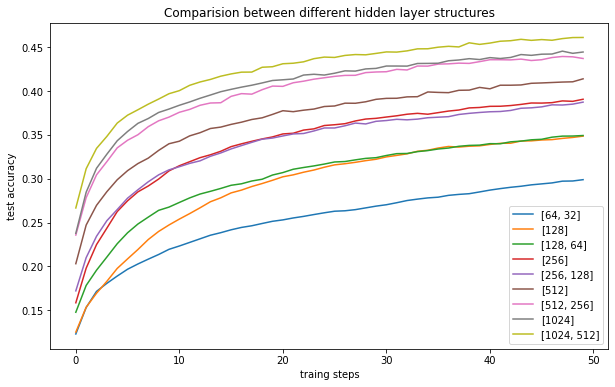

In [ ]:
figure(figsize=(10,6))
plt.plot(log0[2], label='[64, 32]')
plt.plot(log1_1[2], label='[128]')
plt.plot(log1[2], label='[128, 64]')
plt.plot(log2_1[2], label='[256]')
plt.plot(log2[2], label='[256, 128]')
plt.plot(log2_2[2], label='[512]')
plt.plot(log2_3[2], label='[512, 256]')
plt.plot(log2_4[2], label='[1024]')
plt.plot(log2_5[2], label='[1024, 512]')
plt.title("Comparision between different hidden layer structures")
plt.xlabel("traing steps")
plt.ylabel("test accuracy")
plt.legend()
plt.show()

#### 4.3.2 Mini-batch size

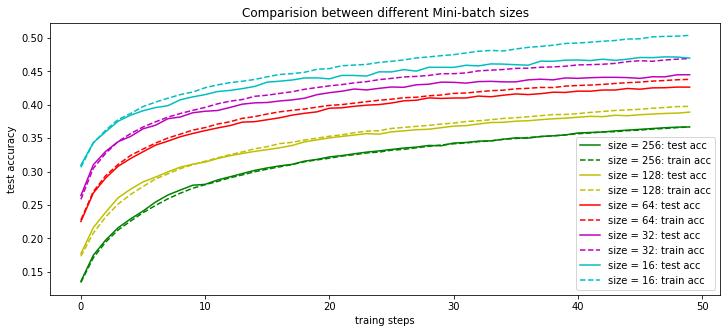

In [ ]:
figure(figsize=(12,5))
plt.plot(log4[2], 'g-', label='size = 256: test acc')
plt.plot(log4[1], 'g--', label='size = 256: train acc')
plt.plot(log2[2], 'y-', label='size = 128: test acc')
plt.plot(log2[1], 'y--', label='size = 128: train acc')
# to avoid introduce additional overfits, we will use 64 as mini-batch size in 
# the following experiments
plt.plot(log3[2], 'r-', label='size = 64: test acc')
plt.plot(log3[1], 'r--', label='size = 64: train acc')
plt.plot(log3_1[2], 'm-', label='size = 32: test acc')
plt.plot(log3_1[1], 'm--', label='size = 32: train acc')
plt.plot(log3_2[2], 'c-', label='size = 16: test acc')
plt.plot(log3_2[1], 'c--', label='size = 16: train acc')
plt.title("Comparision between different Mini-batch sizes")
plt.xlabel("traing steps")
plt.ylabel("test accuracy")
plt.legend()
plt.show()

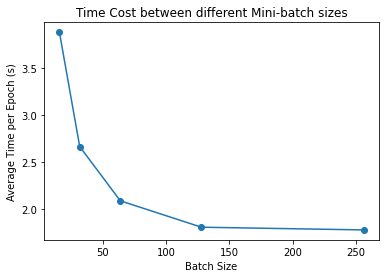

In [ ]:
batch_sizes = [16, 32, 64, 128, 256]
ave_time = [np.mean(log3_2[3]), np.mean(log3_1[3]), np.mean(log3[3]), np.mean(log2[3]),
            np.mean(log4[3])]

plt.plot(batch_sizes, ave_time, marker='o')
plt.title("Time Cost between different Mini-batch sizes")
plt.xlabel("Batch Size")
plt.ylabel("Average Time per Epoch (s)")
plt.show()

#### 4.3.3 Momentum

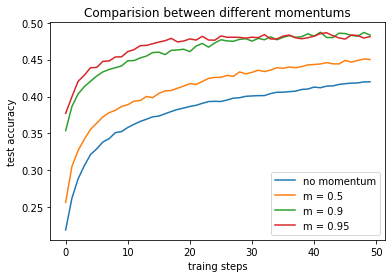

In [ ]:
plt.plot(log3[2], label='no momentum')
plt.plot(log8[2], label='m = 0.5')
plt.plot(log6[2], label='m = 0.9')
plt.plot(log7[2], label='m = 0.95')
plt.title("Comparision between different momentums")
plt.xlabel("traing steps")
plt.ylabel("test accuracy")
plt.legend()
plt.show()

#### 4.3.4 SGD (Momentum in SGD)

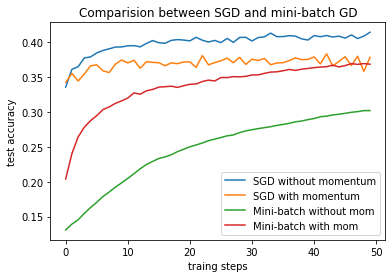

In [ ]:
plt.plot(log5[2], label='SGD without momentum')
plt.plot(log15[2], label='SGD with momentum')
# Mini-batch here is 128
plt.plot(log0[2], label='Mini-batch without mom')
plt.plot(log0_1[2], label='Mini-batch with mom')
plt.title("Comparision between SGD and mini-batch GD")
plt.xlabel("traing steps")
plt.ylabel("test accuracy")
plt.legend()
plt.show()

#### 4.3.5 Weight Decay

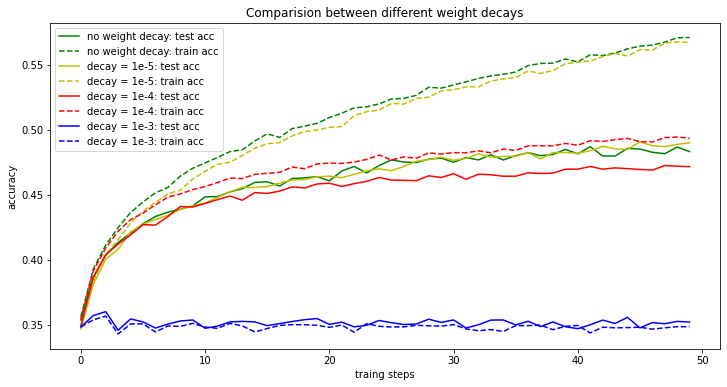

In [ ]:
# decay should be chosed around 1e-4
figure(figsize=(12,6))
plt.plot(log6[2], 'g-', label='no weight decay: test acc')
plt.plot(log6[1], 'g--', label='no weight decay: train acc')
plt.plot(log10_1[2], 'y-', label='decay = 1e-5: test acc')
plt.plot(log10_1[1], 'y--', label='decay = 1e-5: train acc')
plt.plot(log9[2], 'r-', label='decay = 1e-4: test acc')
plt.plot(log9[1], 'r--', label='decay = 1e-4: train acc')
plt.plot(log10[2], 'b-', label='decay = 1e-3: test acc')
plt.plot(log10[1], 'b--', label='decay = 1e-3: train acc')
plt.title("Comparision between different weight decays")
plt.xlabel("traing steps")
plt.ylabel("accuracy")
plt.legend()
plt.show()

#### 4.3.6 Dropout

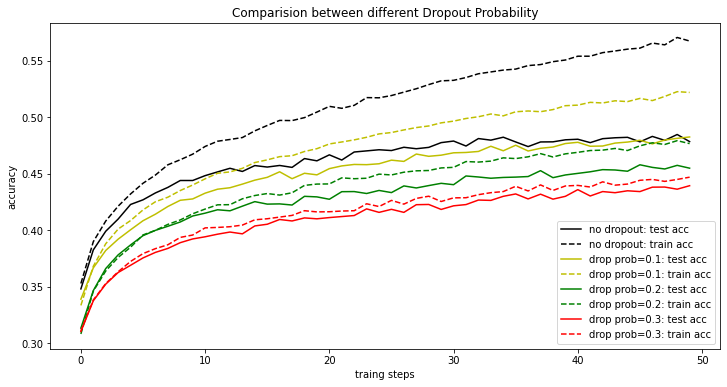

In [ ]:
# the momentom introduced obvious overfitting
figure(figsize=(12,6))
plt.plot(log6[2], 'k-', label='no dropout: test acc')
plt.plot(log6[1], 'k--', label='no dropout: train acc')
plt.plot(log12_1[2], 'y-', label='drop prob=0.1: test acc')
plt.plot(log12_1[1], 'y--', label='drop prob=0.1: train acc')
plt.plot(log11[2], 'g-', label='drop prob=0.2: test acc')
plt.plot(log11[1], 'g--', label='drop prob=0.2: train acc')
plt.plot(log12[2], 'r-', label='drop prob=0.3: test acc')
plt.plot(log12[1], 'r--', label='drop prob=0.3: train acc')

# a dropout between 0.1 ~ 0.2 seems to be a reasonable choise
plt.title("Comparision between different Dropout Probability")
plt.xlabel("traing steps")
plt.ylabel("accuracy")
plt.legend()
plt.show()

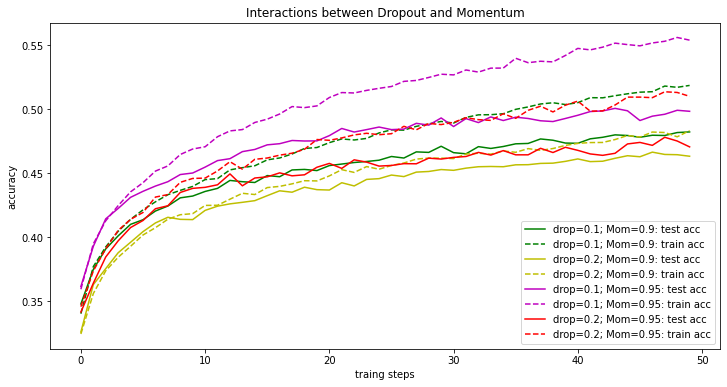

In [ ]:
# the momentom introduced obvious overfitting
figure(figsize=(12,6))
plt.plot(log12_1[2], 'g-', label='drop=0.1; Mom=0.9: test acc')
plt.plot(log12_1[1], 'g--', label='drop=0.1; Mom=0.9: train acc')
plt.plot(log11[2], 'y-', label='drop=0.2; Mom=0.9: test acc')
plt.plot(log11[1], 'y--', label='drop=0.2; Mom=0.9: train acc')
plt.plot(log13_1[2], 'm-', label='drop=0.1; Mom=0.95: test acc')
plt.plot(log13_1[1], 'm--', label='drop=0.1; Mom=0.95: train acc')
plt.plot(log13[2], 'r-', label='drop=0.2; Mom=0.95: test acc')
plt.plot(log13[1], 'r--', label='drop=0.2; Mom=0.95: train acc')

# a dropout between 0.1 ~ 0.2 seems to be a reasonable choise
plt.title("Interactions between Dropout and Momentum")
plt.xlabel("traing steps")
plt.ylabel("accuracy")
plt.legend()
plt.show()

#### 4.3.7 Batch-Normalisation

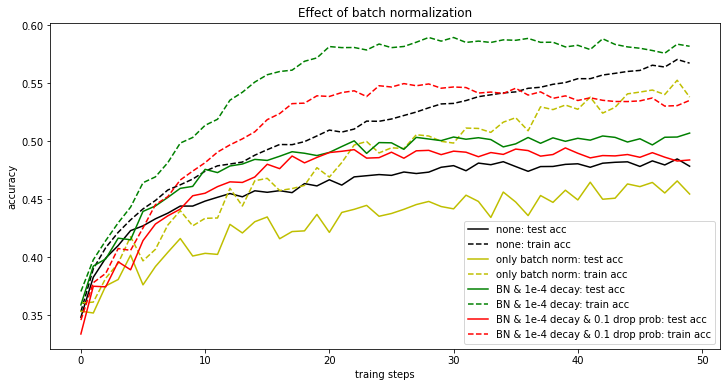

In [ ]:
figure(figsize=(12,6))
plt.plot(log6[2], 'k-', label='none: test acc')
plt.plot(log6[1], 'k--', label='none: train acc')
plt.plot(log14[2], 'y-', label='only batch norm: test acc')
plt.plot(log14[1], 'y--', label='only batch norm: train acc')
plt.plot(log17[2], 'g-', label='BN & 1e-4 decay: test acc')
plt.plot(log17[1], 'g--', label='BN & 1e-4 decay: train acc')
plt.plot(log16[2], 'r-', label='BN & 1e-4 decay & 0.1 drop prob: test acc')
plt.plot(log16[1], 'r--', label='BN & 1e-4 decay & 0.1 drop prob: train acc')

plt.title("Effect of batch normalization")
plt.xlabel("traing steps")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [ ]:
print('The time taken {:.2f}s'.format(time.time() - S_t))